Exploring the Card Fraud Detection dataset from kaggle.

Anonymized credit card transactions labeled as fraudulent or genuine.

Available at www.kaggle.com/mlg-ulb/creditcardfraud

# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

# Loading the dataset

In [2]:
%%time
data_path = "creditcard.csv"
df = pd.read_csv(data_path)
print(f'Number of rows: {df.shape[0]} Number of columns: {df.shape[1]}')
df.head()

Number of rows: 284807 Number of columns: 31
CPU times: user 3.35 s, sys: 155 ms, total: 3.51 s
Wall time: 3.6 s


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Getting columns' description

In [3]:
%%time
df.describe()

CPU times: user 559 ms, sys: 44 ms, total: 603 ms
Wall time: 603 ms


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


As there are some columns with very large values, when building the various data sets for
the model training process, we will need to scale down the data.

# Splitting dataframe by Class

In [4]:
%%time
anomalies = df[df.Class == 1]
normal = df[df.Class == 0]
print(f"Anomalies: {anomalies.shape}")
print(f"Normal: {normal.shape}") 
#the data is overwhelmingly biased towards normal data
#we will have to craft the training, evaluation, and validation sets very carefully so each of
#them have a good representation of anomaly data.

Anomalies: (492, 31)
Normal: (284315, 31)
CPU times: user 40.7 ms, sys: 23.8 ms, total: 64.5 ms
Wall time: 71.7 ms


# Defining some plotting functions

In [5]:
def plot_histogram(df, bins, column, log_scale=False):
    
    anomalies = df[df.Class == 1]
    normal = df[df.Class == 0]
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    fig.suptitle(f'Counts of {column} by Class')
    ax1.hist(anomalies[column], bins = bins, color="red")
    ax1.set_title('Anomaly')
    ax2.hist(normal[column], bins = bins, color="orange")
    ax2.set_title('Normal')
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    if log_scale:
        plt.yscale('log')
    plt.xlim((np.min(df[column]), np.max(df[column])))
    plt.show()
    
def plot_scatter(df, x_col, y_col, sharey = False):
    anomalies = df[df.Class == 1]
    normal = df[df.Class == 0]
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=sharey)
    fig.suptitle(f'{y_col} over {x_col} by Class')
    ax1.scatter(anomalies[x_col], anomalies[y_col], color='red')
    ax1.set_title('Anomaly')
    ax2.scatter(normal[x_col], normal[y_col], color='orange')
    ax2.set_title('Normal')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

# Data visualization

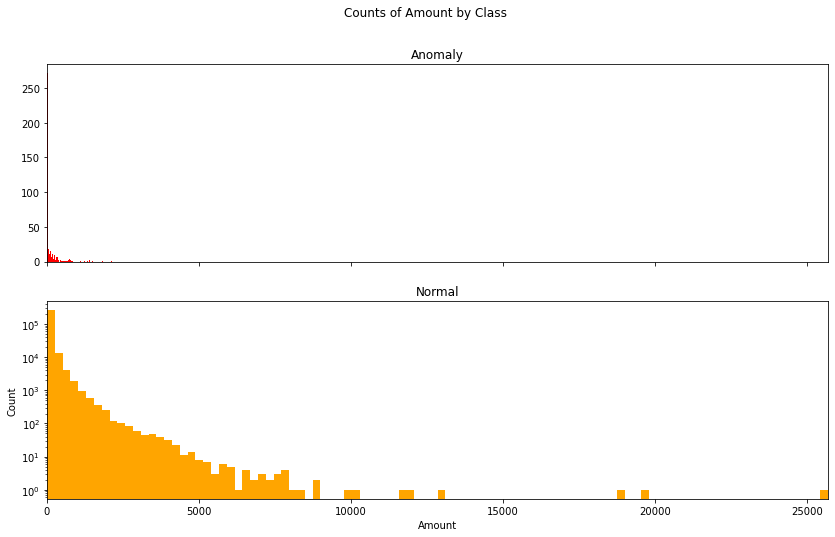

CPU times: user 2.86 s, sys: 92 ms, total: 2.95 s
Wall time: 3 s


In [6]:
%%time
bins = 100
plot_histogram(df, bins, "Amount", log_scale=True)

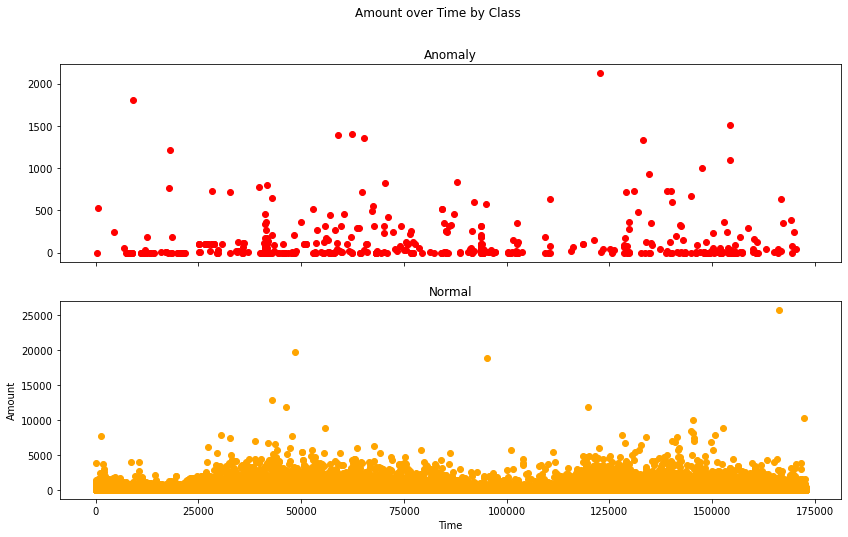

CPU times: user 1.28 s, sys: 99.5 ms, total: 1.38 s
Wall time: 1.38 s


In [7]:
%%time
plot_scatter(df, "Time", "Amount")

V1 Counts


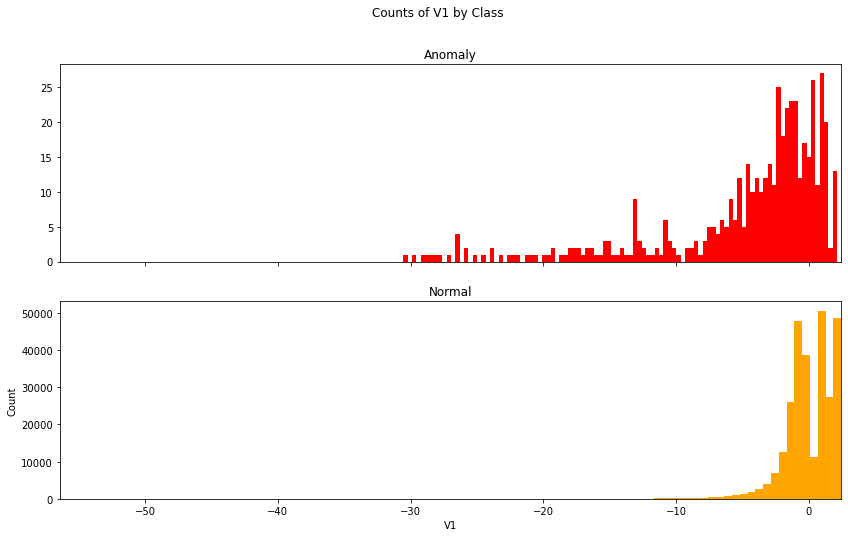

V2 Counts


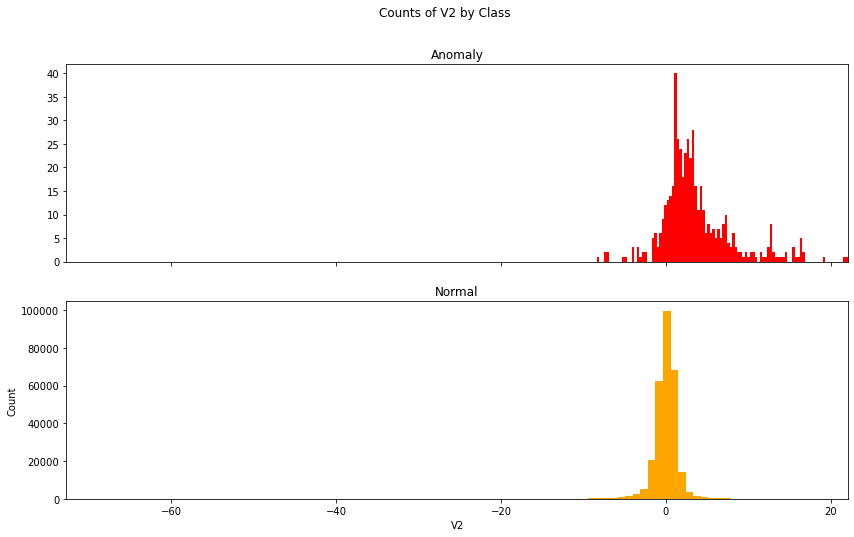

V3 Counts


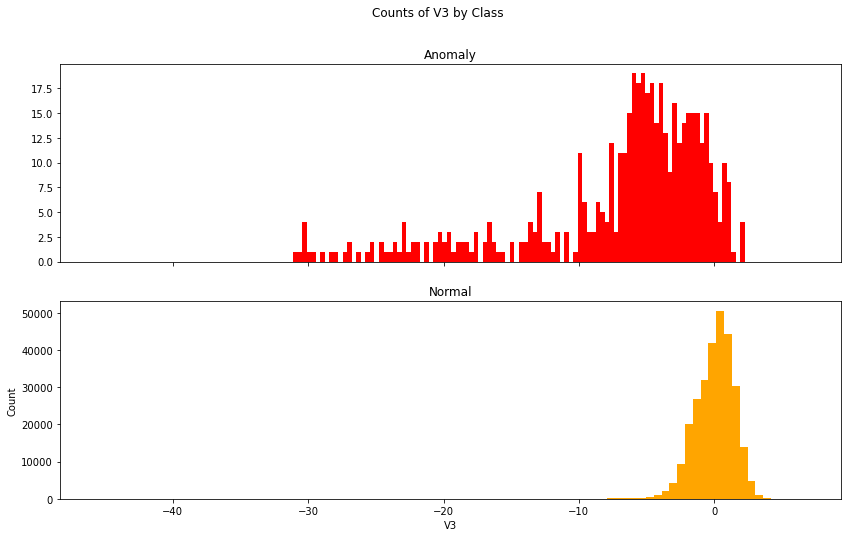

V4 Counts


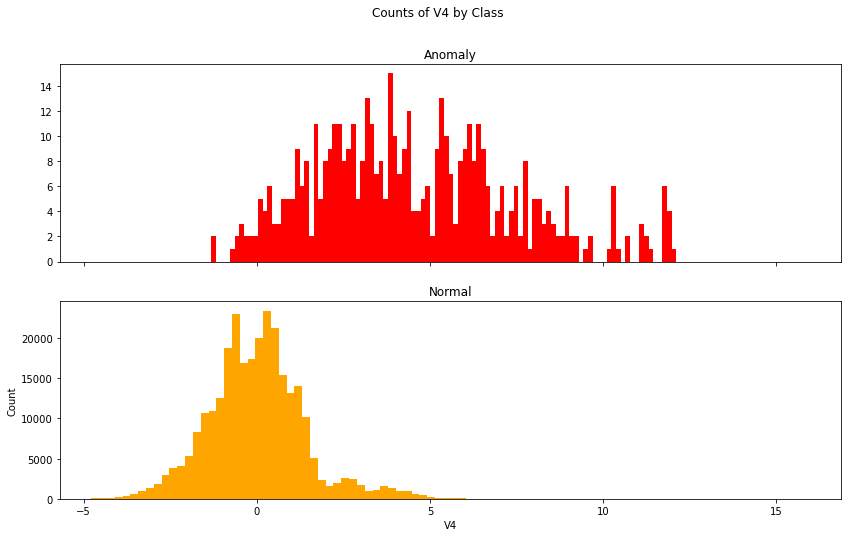

V5 Counts


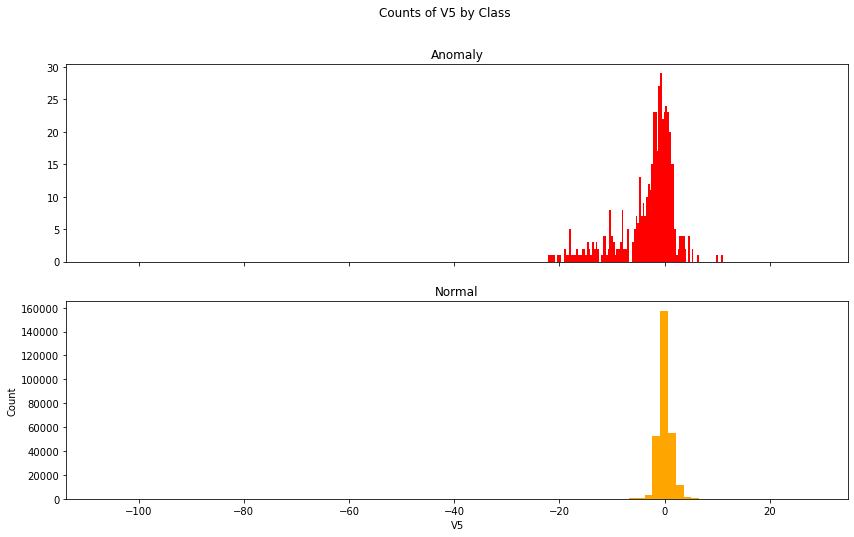

V6 Counts


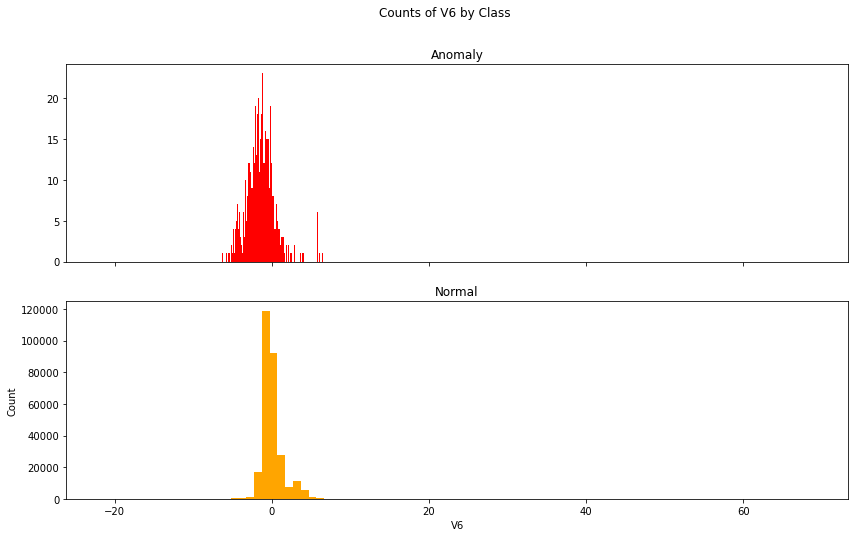

V7 Counts


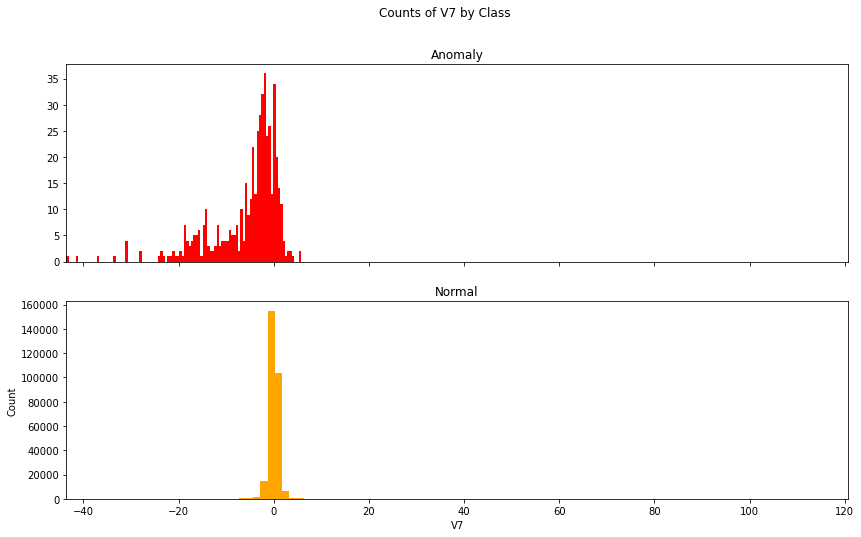

V8 Counts


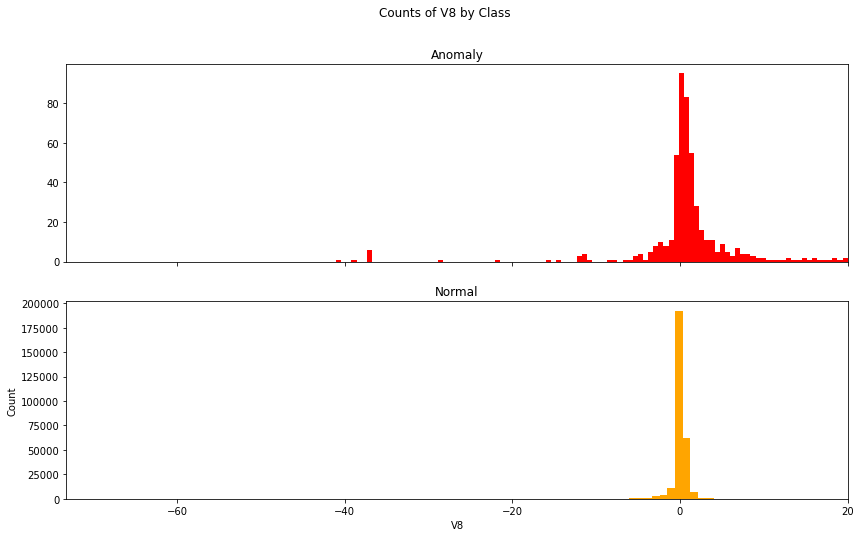

V9 Counts


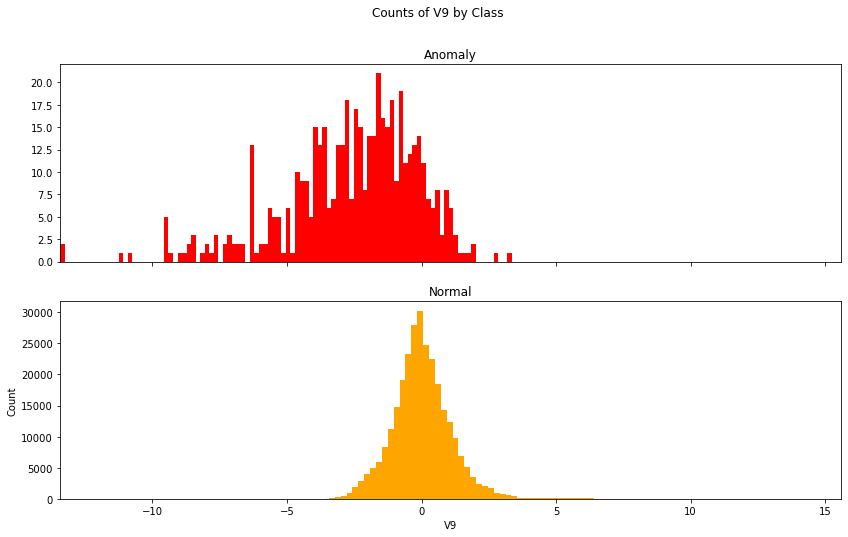

V10 Counts


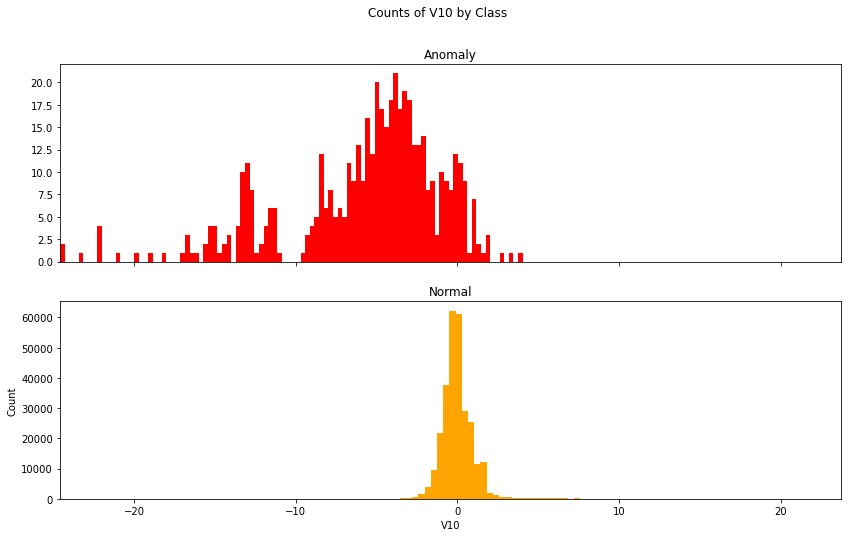

V11 Counts


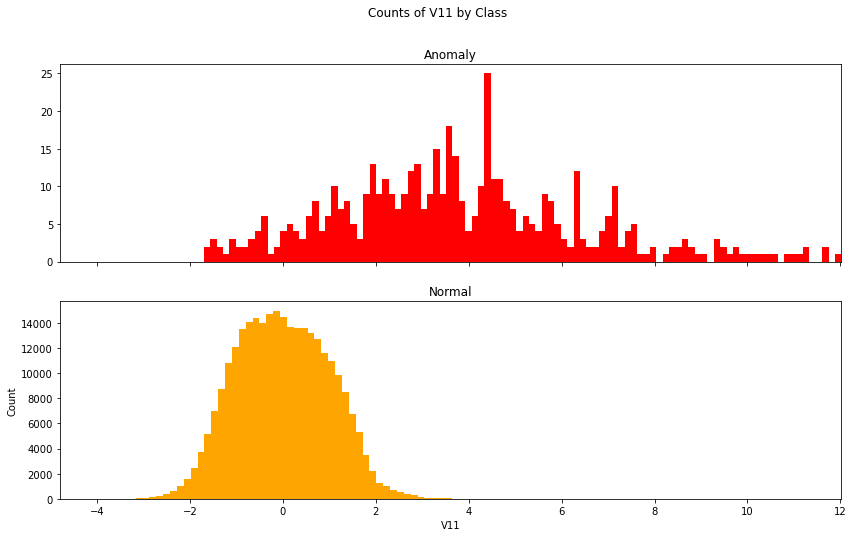

V12 Counts


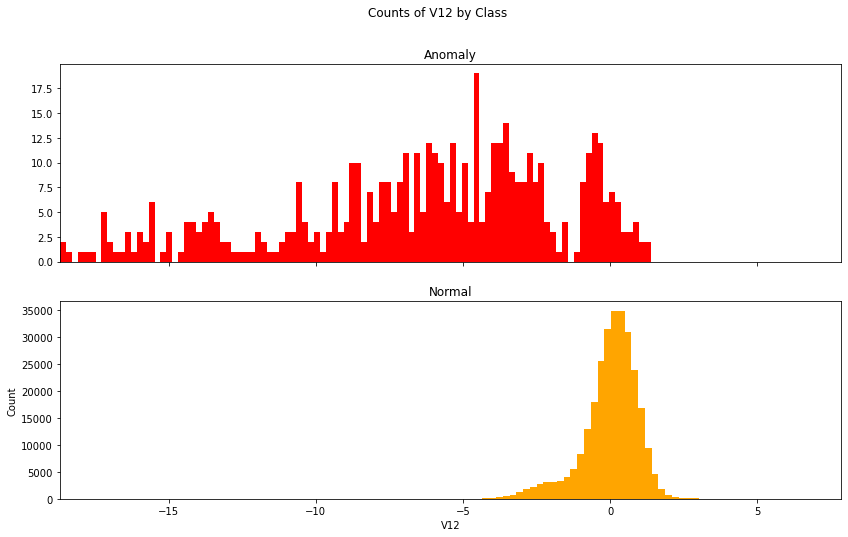

V13 Counts


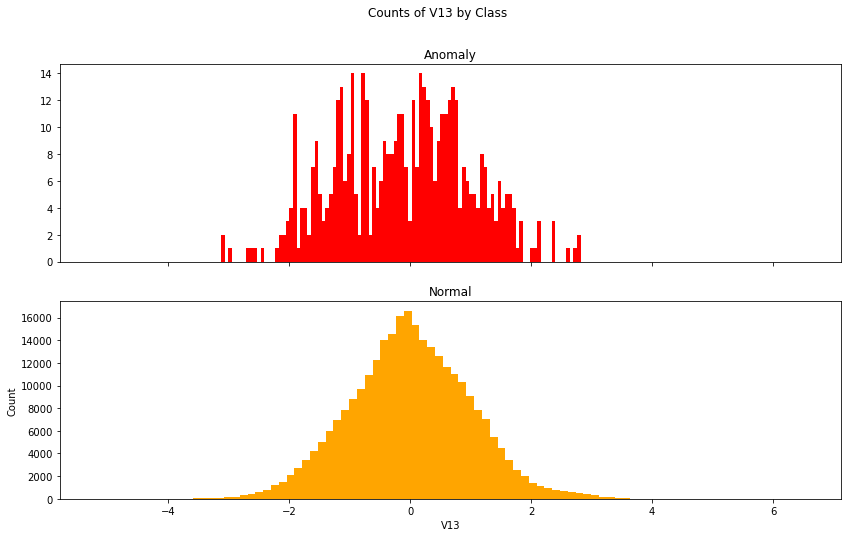

V14 Counts


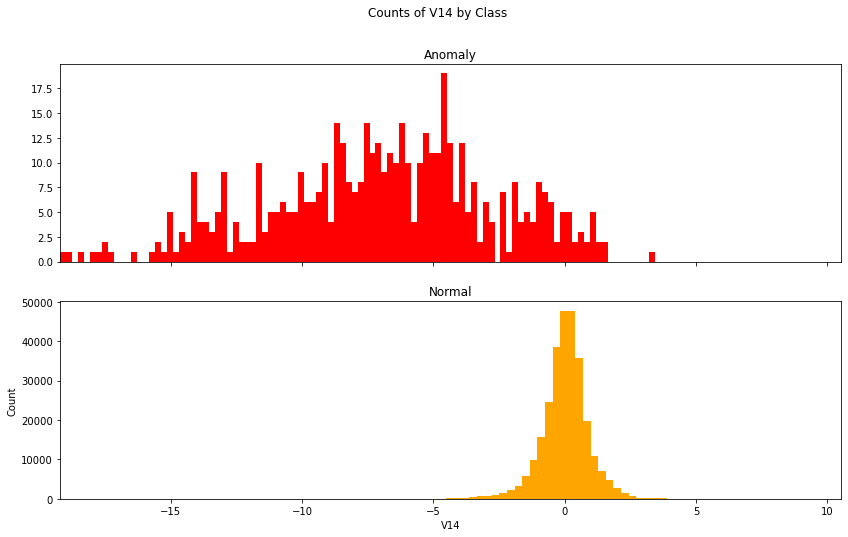

V15 Counts


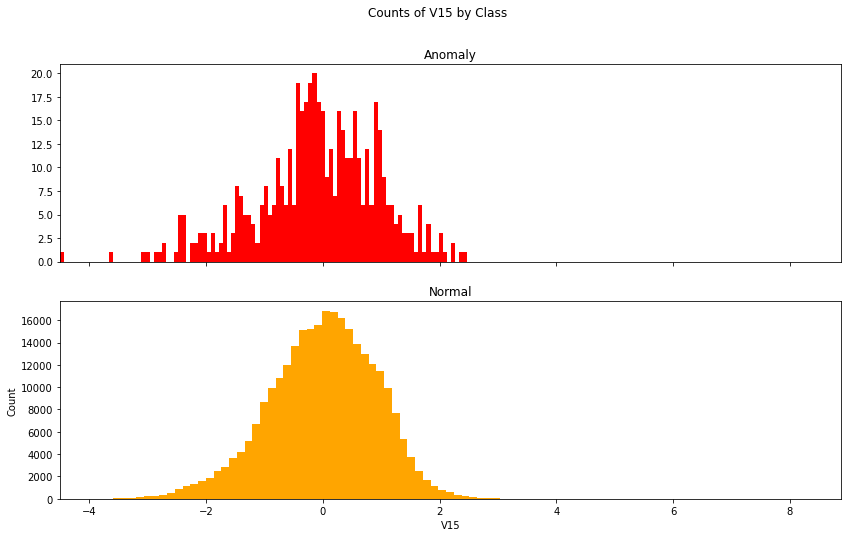

V16 Counts


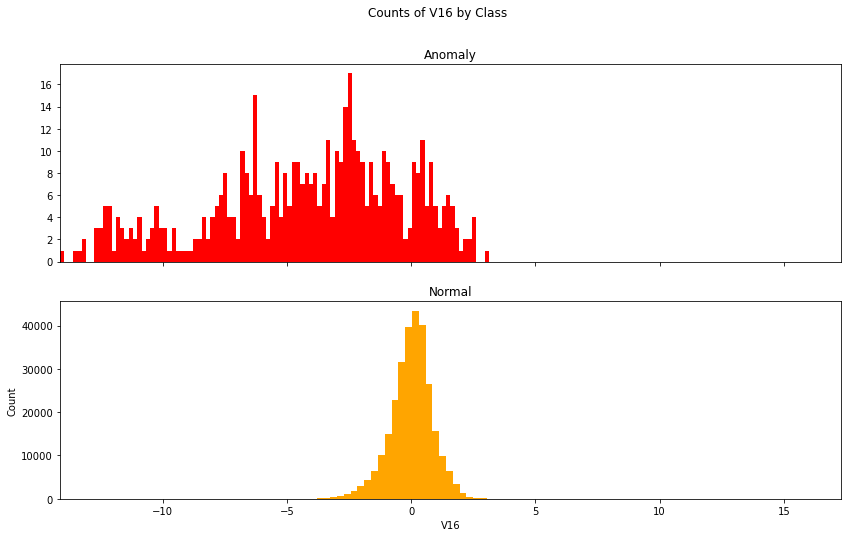

V17 Counts


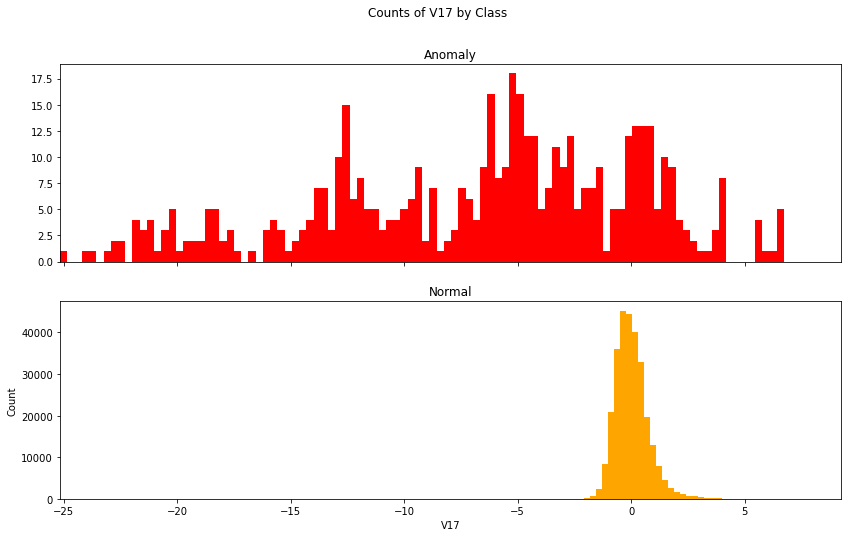

V18 Counts


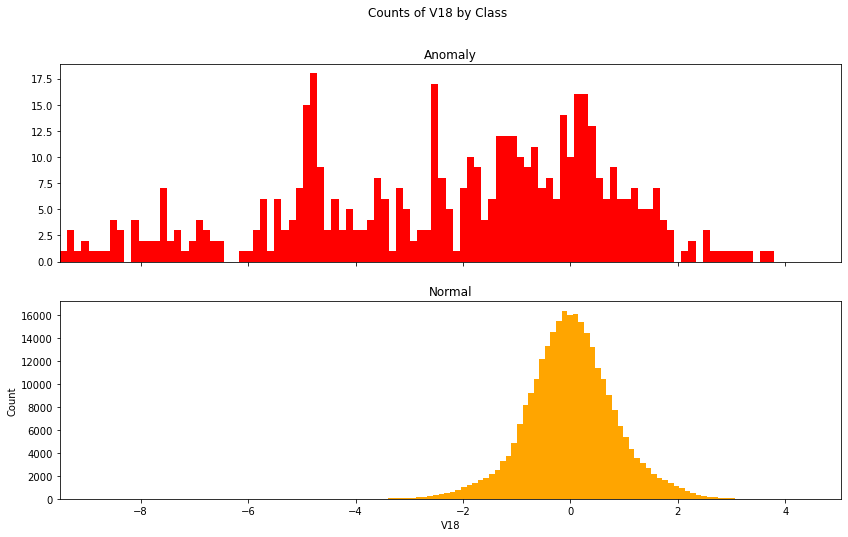

V19 Counts


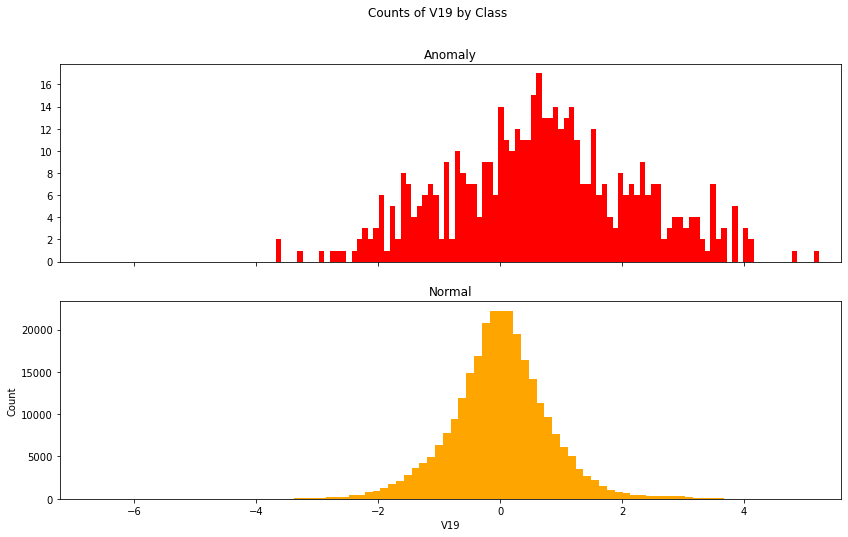

V20 Counts


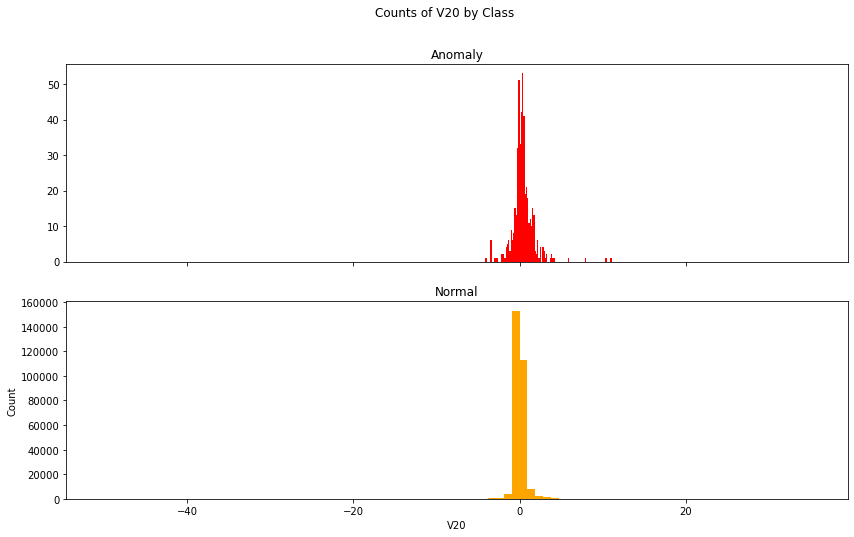

V21 Counts


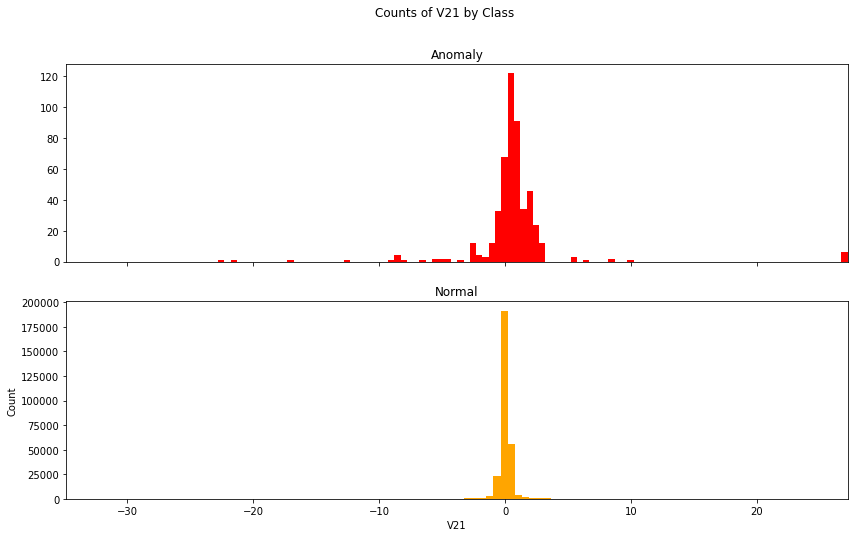

V22 Counts


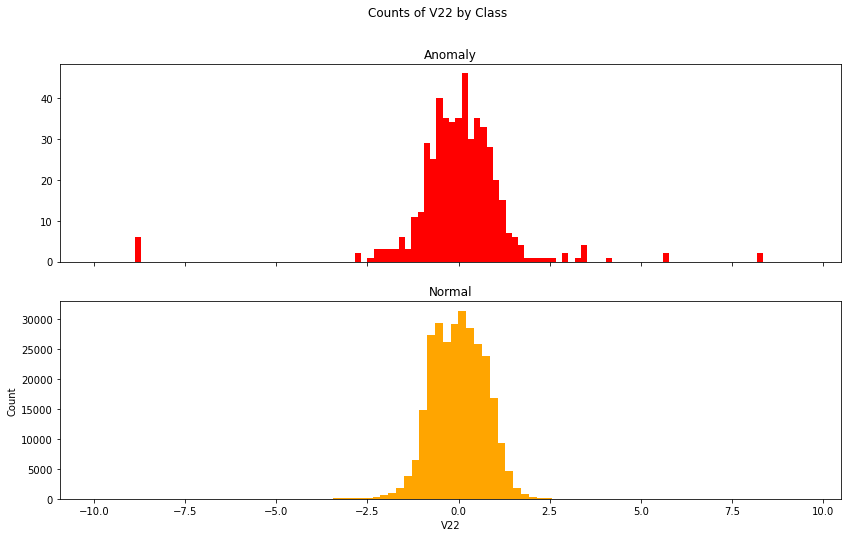

V23 Counts


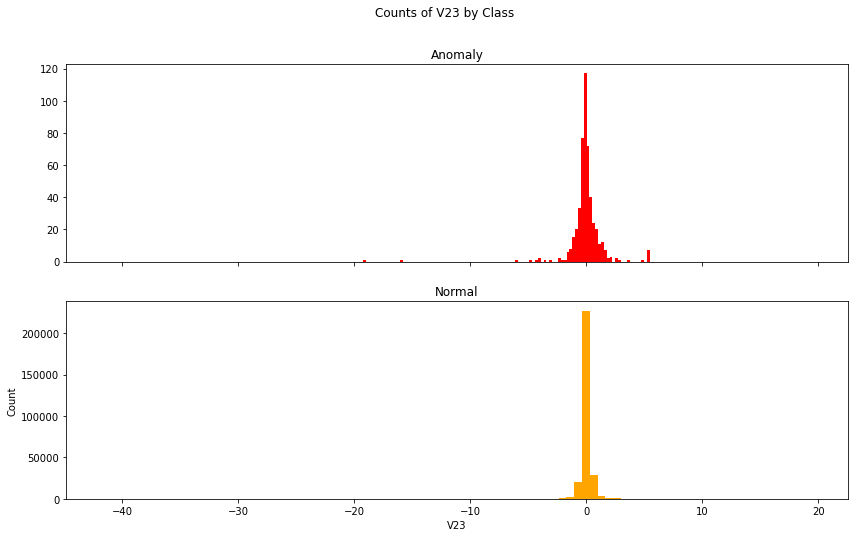

V24 Counts


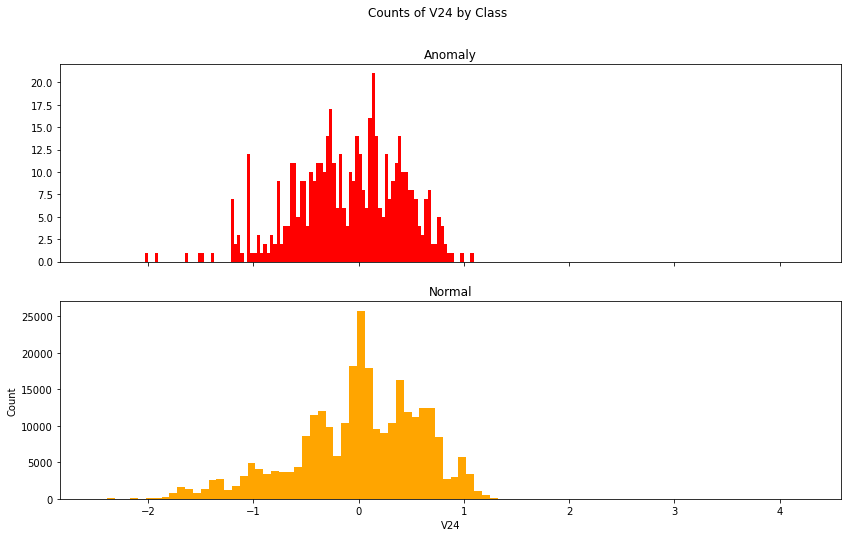

V25 Counts


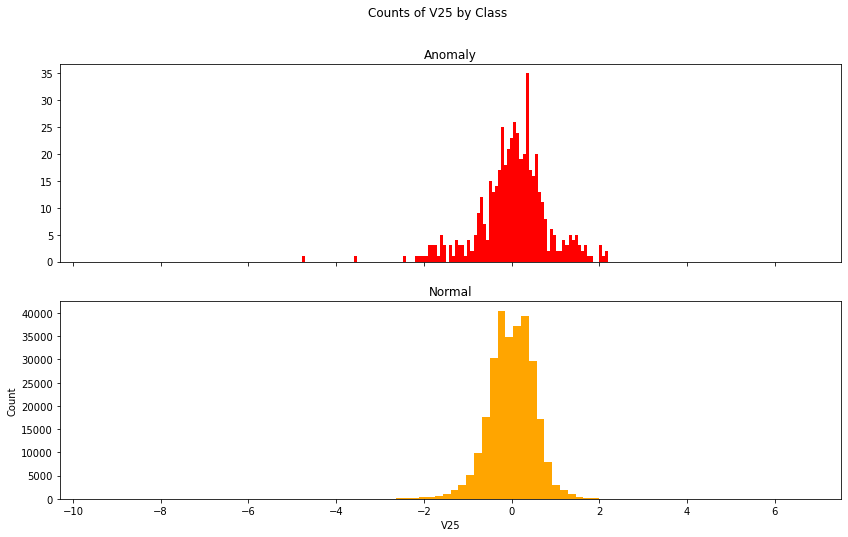

V26 Counts


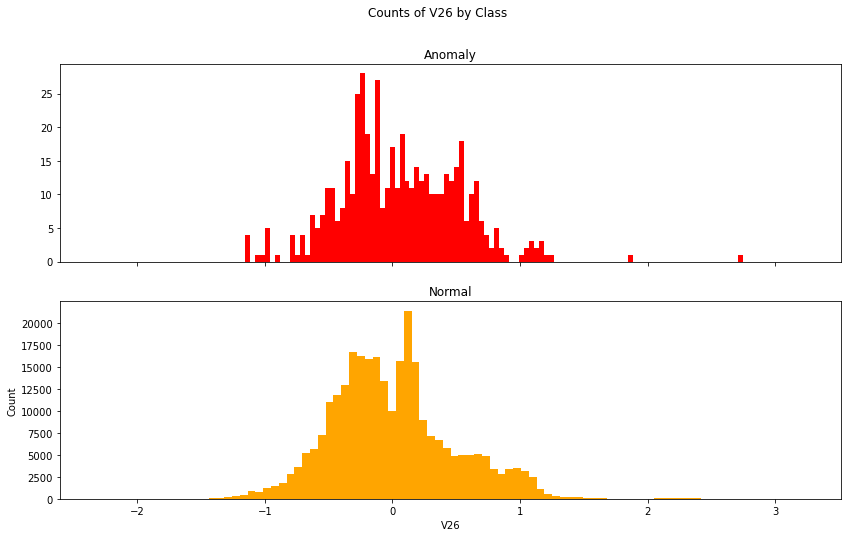

V27 Counts


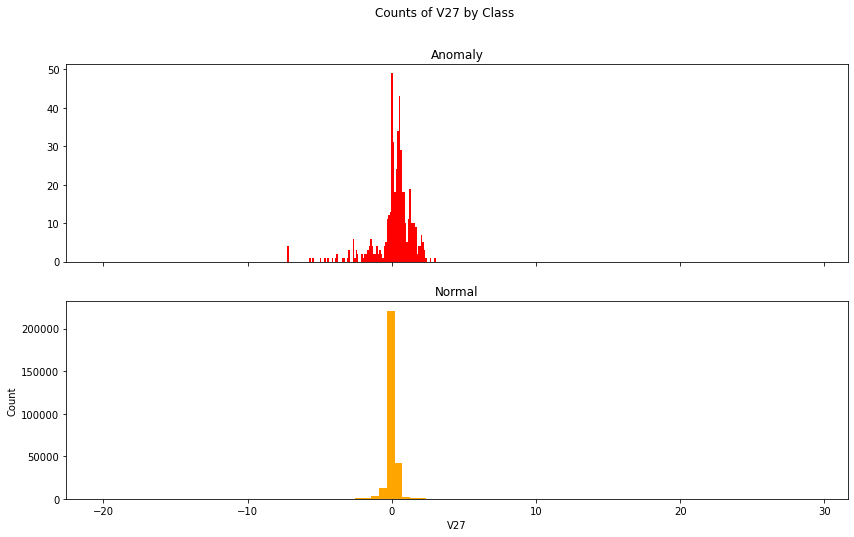

V28 Counts


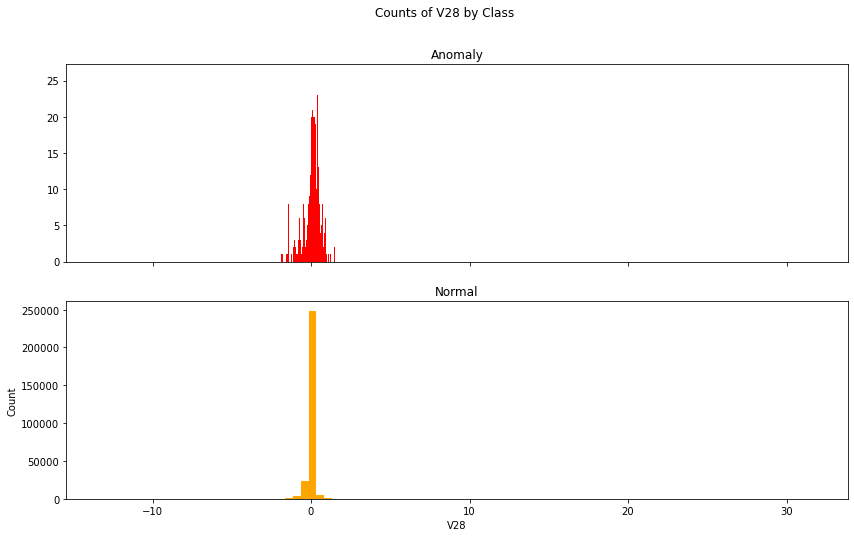

CPU times: user 36.8 s, sys: 562 ms, total: 37.3 s
Wall time: 37.6 s


In [8]:
%%time
#looking at all variables at once
for f in range(1, 29):
    print(f'V{f} Counts')
    plot_histogram(df, bins, f'V{f}')
    
#features such as V12, V17 are certainly more important in helping give the model a better context

V1 vs Time


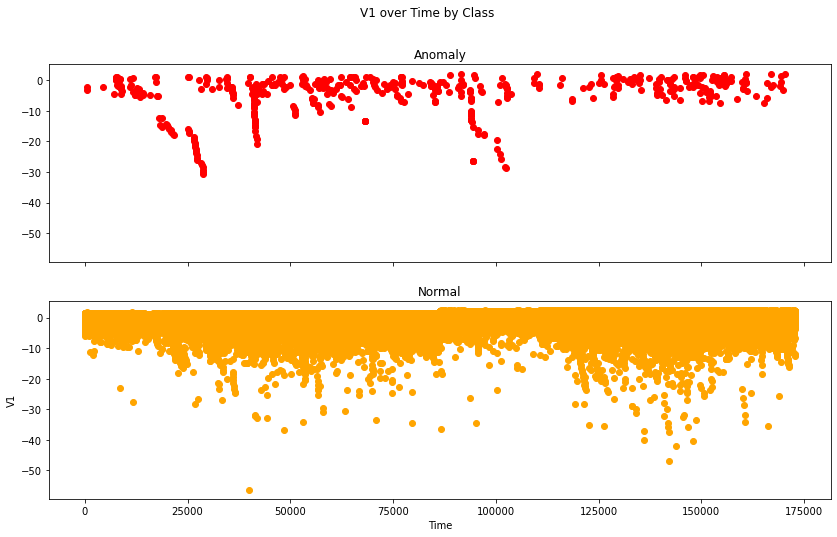

V2 vs Time


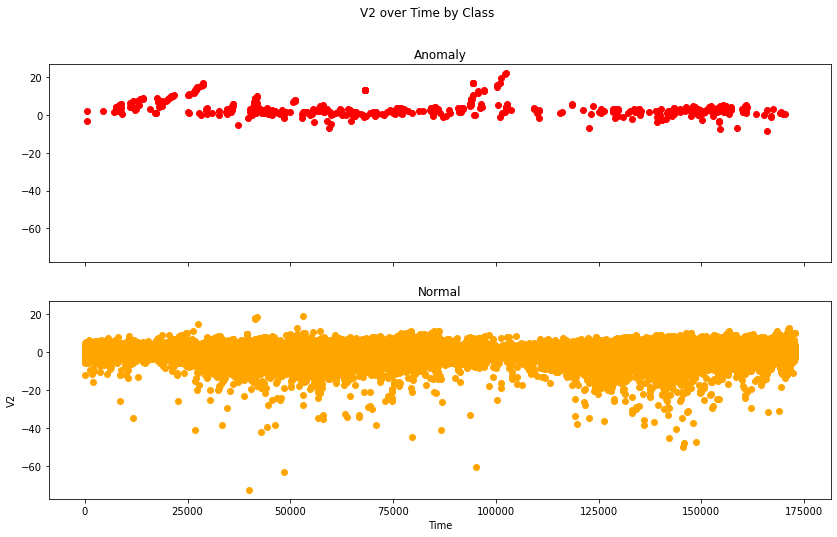

V3 vs Time


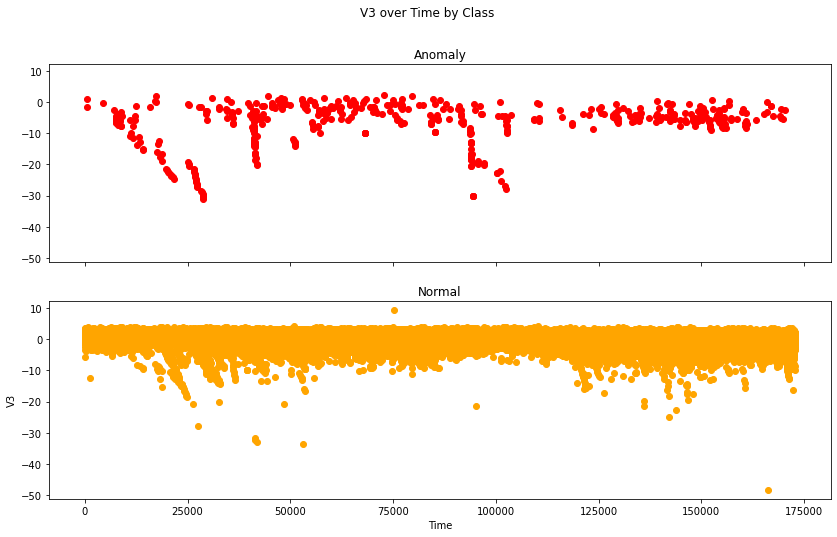

V4 vs Time


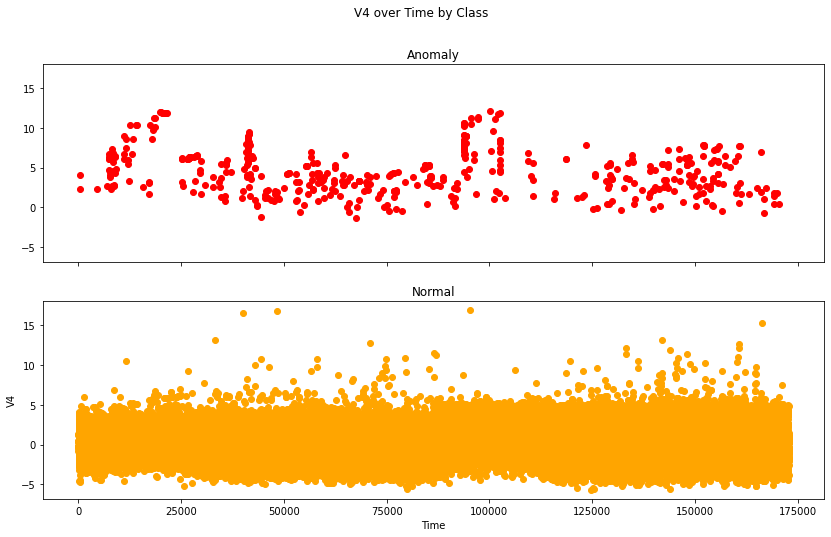

V5 vs Time


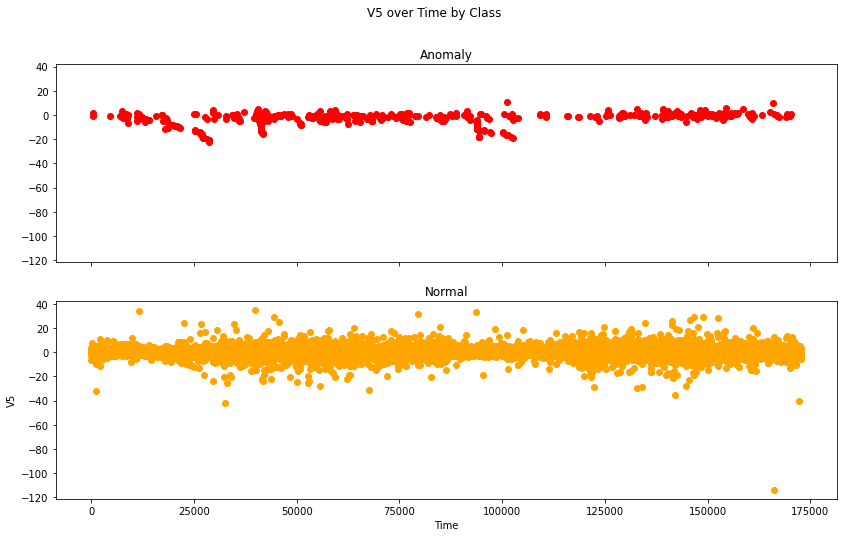

V6 vs Time


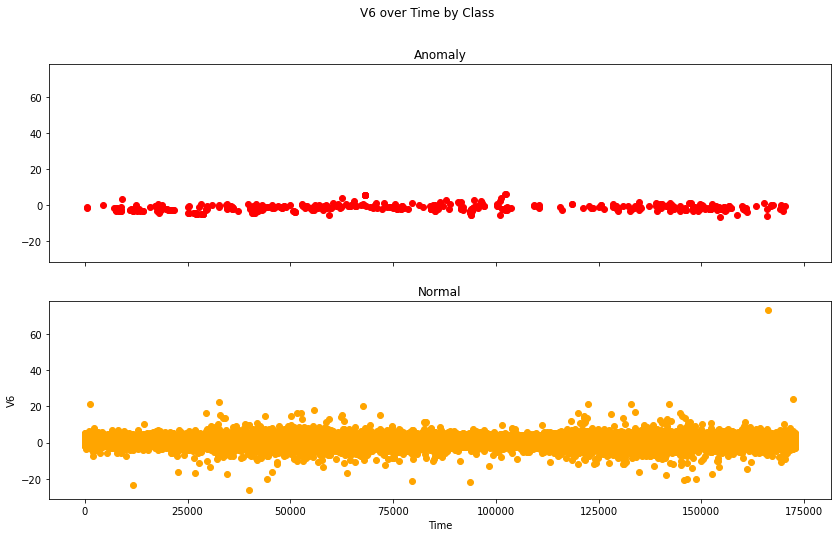

V7 vs Time


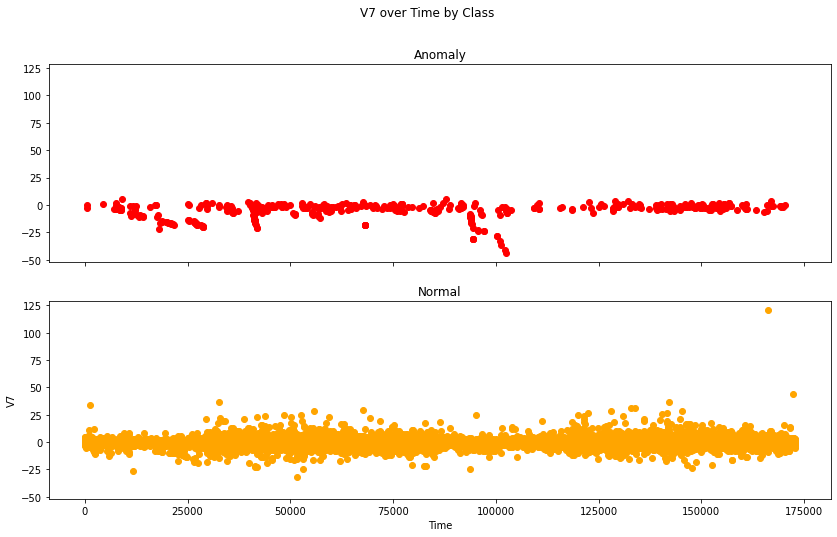

V8 vs Time


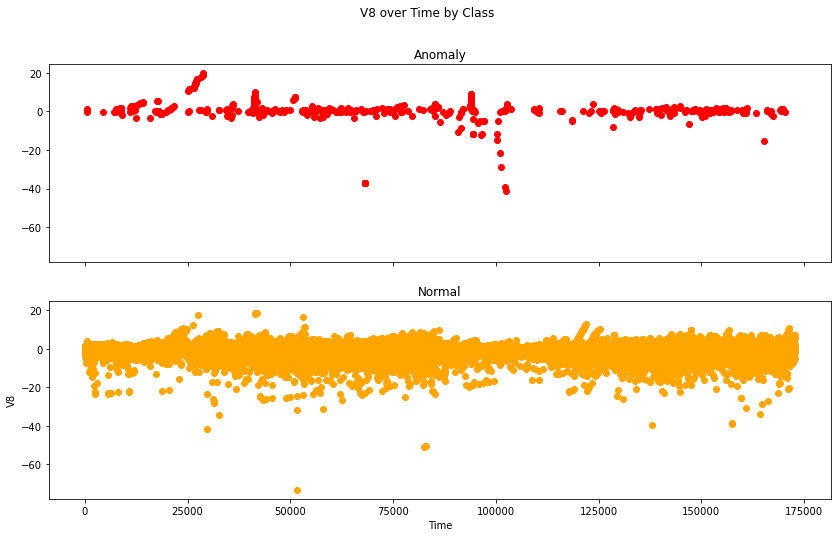

V9 vs Time


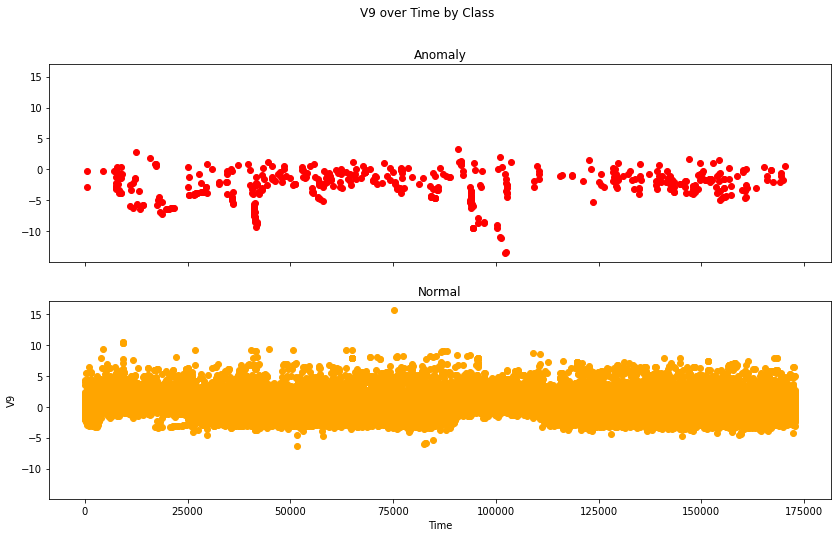

V10 vs Time


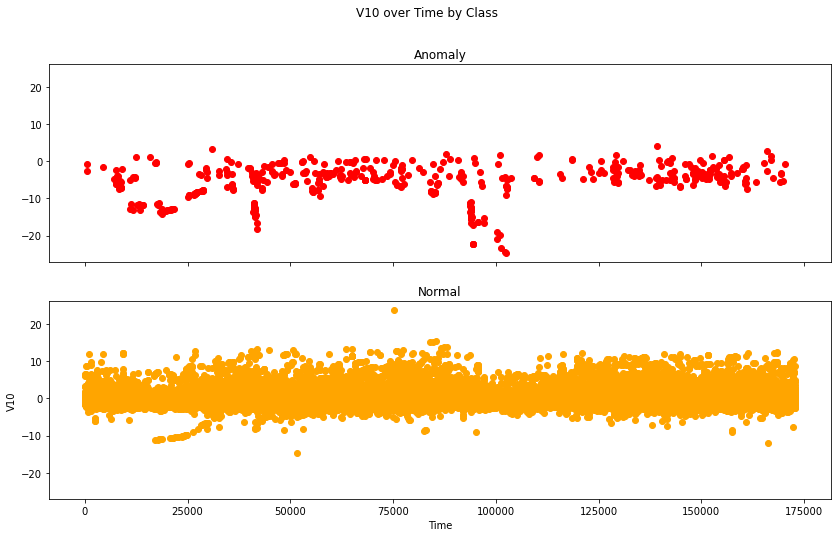

V11 vs Time


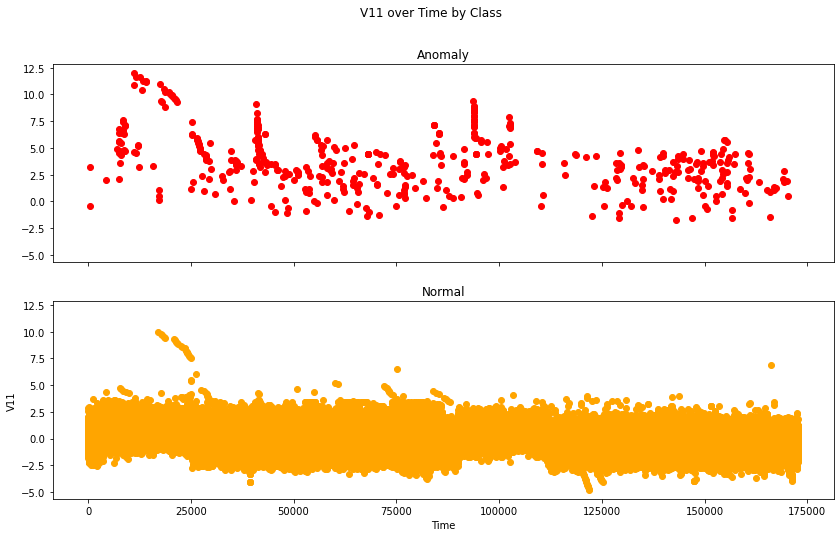

V12 vs Time


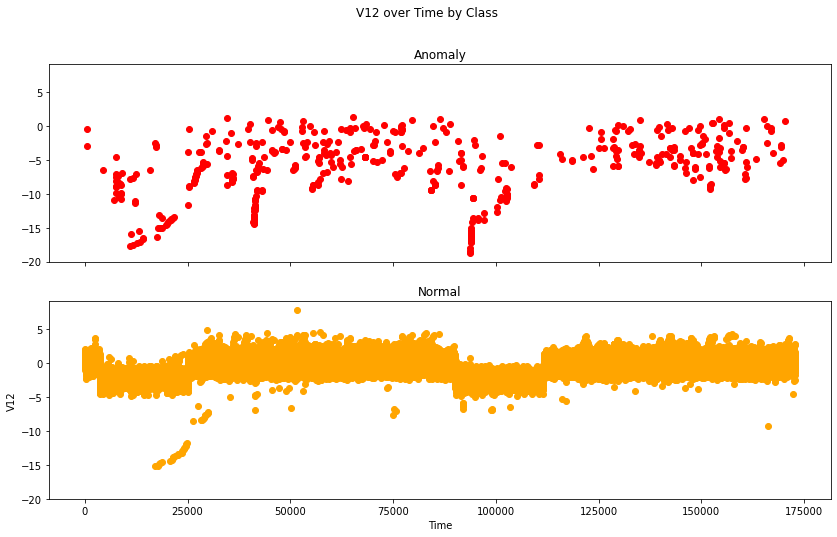

V13 vs Time


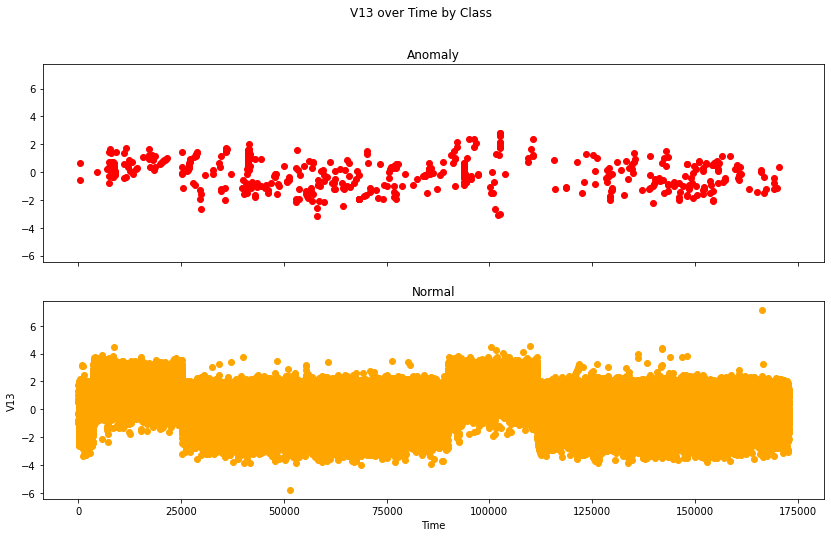

V14 vs Time


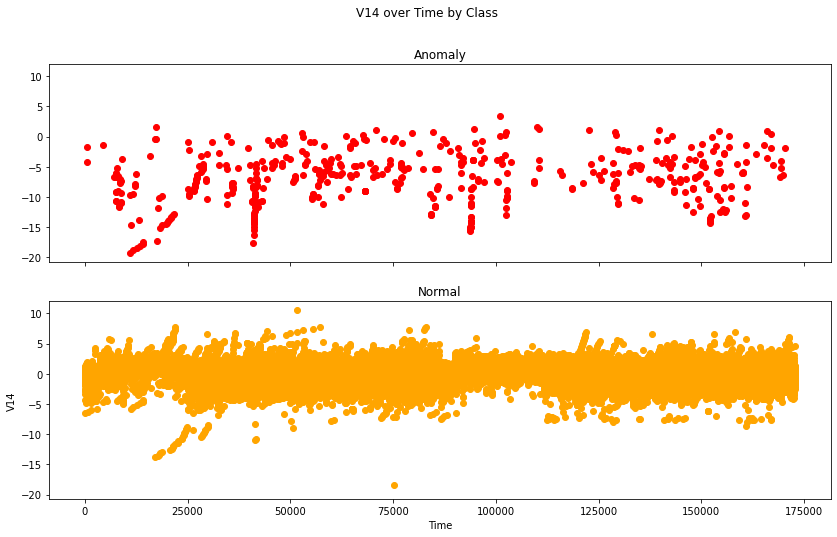

V15 vs Time


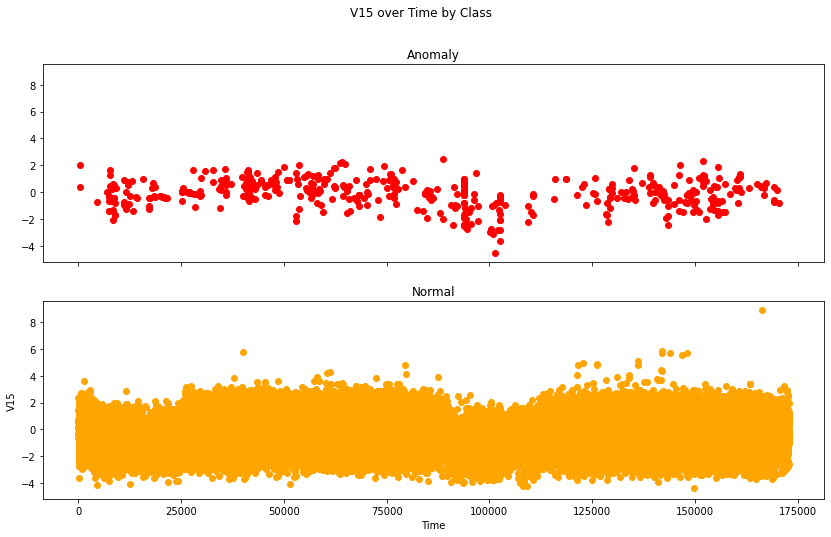

V16 vs Time


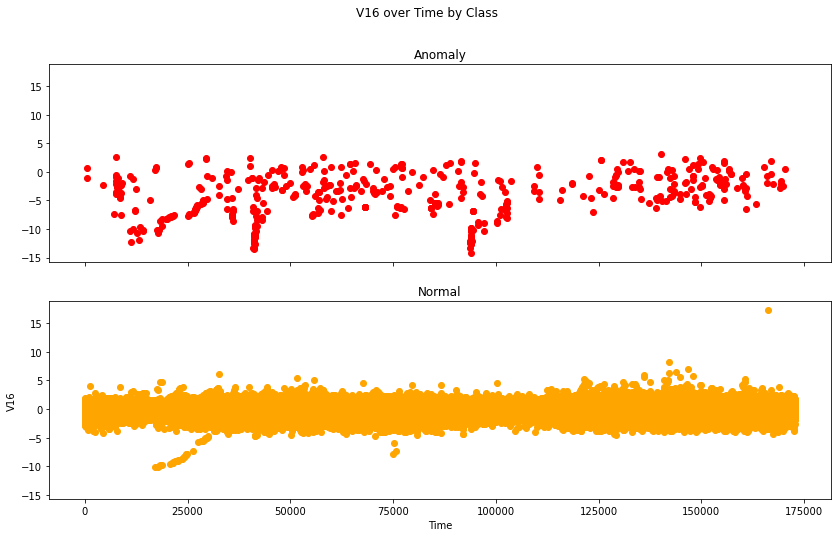

V17 vs Time


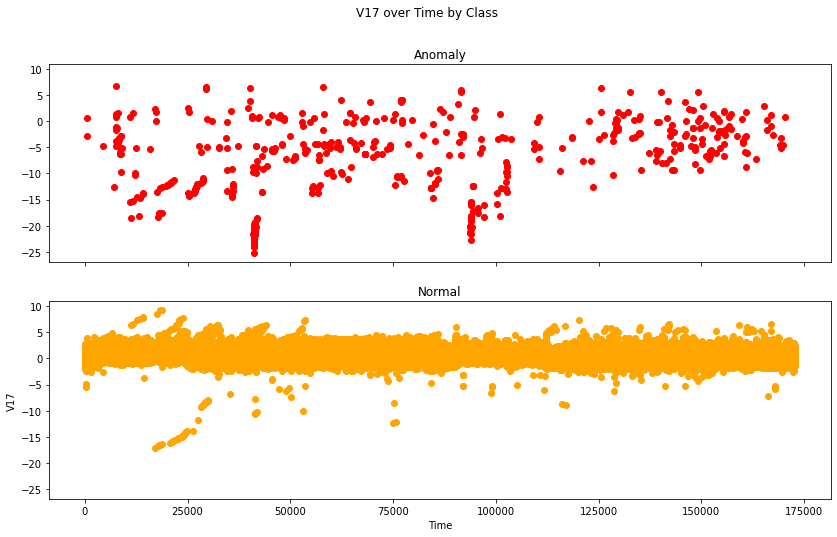

V18 vs Time


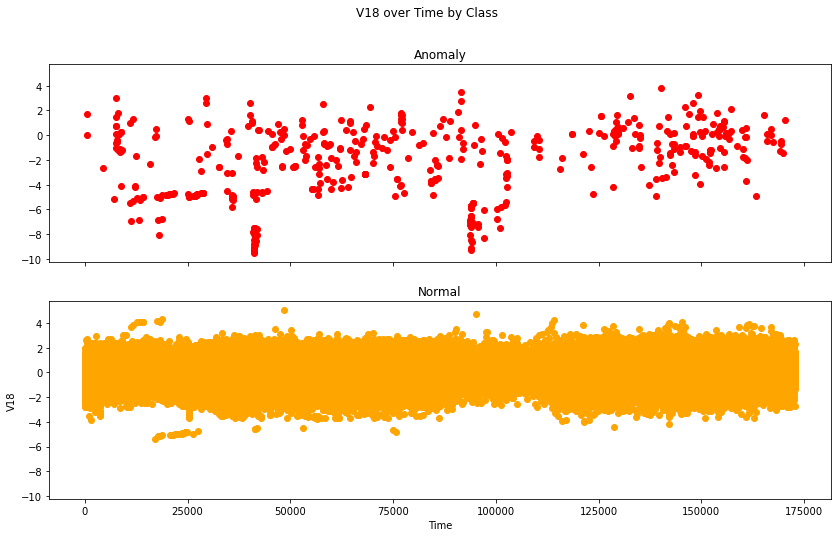

V19 vs Time


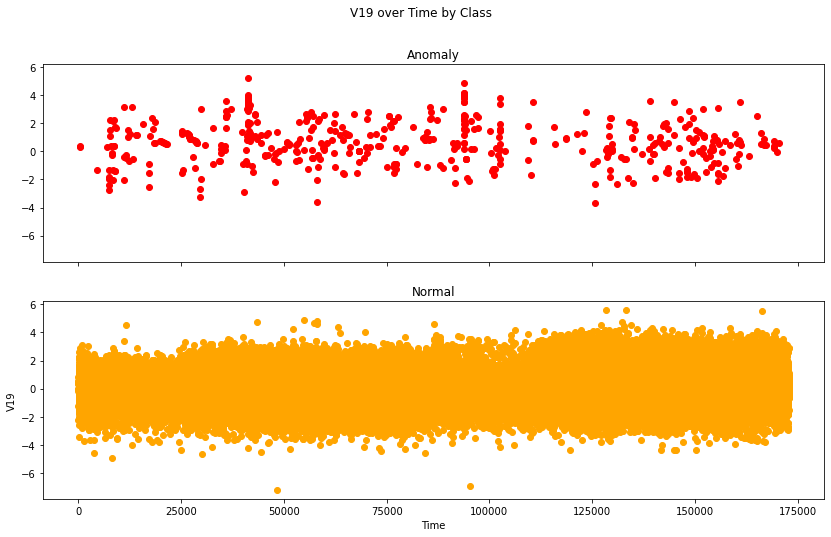

V20 vs Time


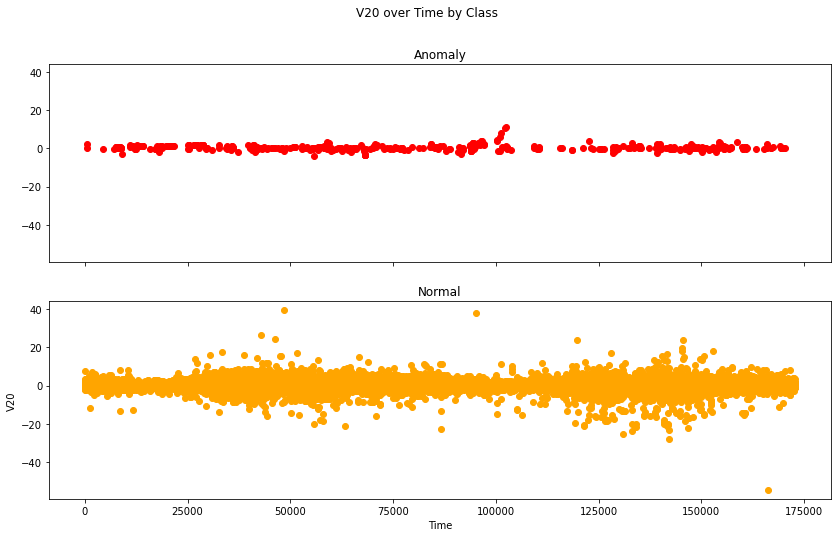

V21 vs Time


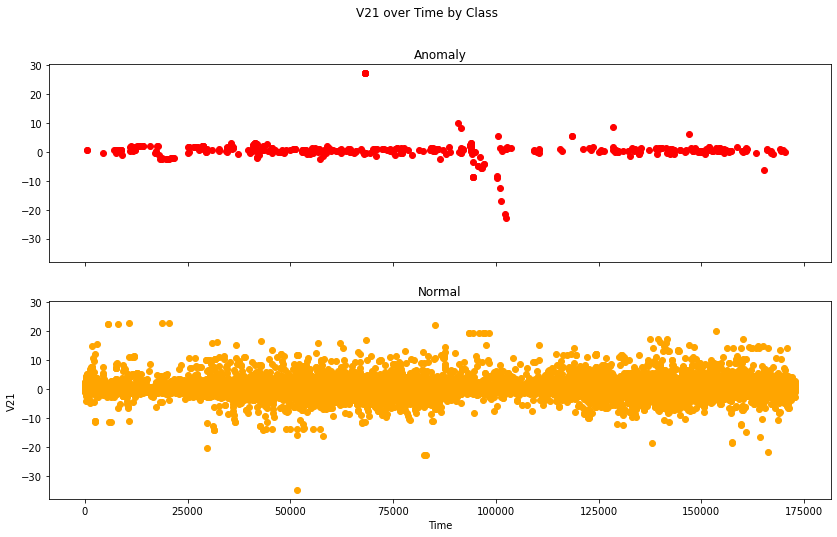

V22 vs Time


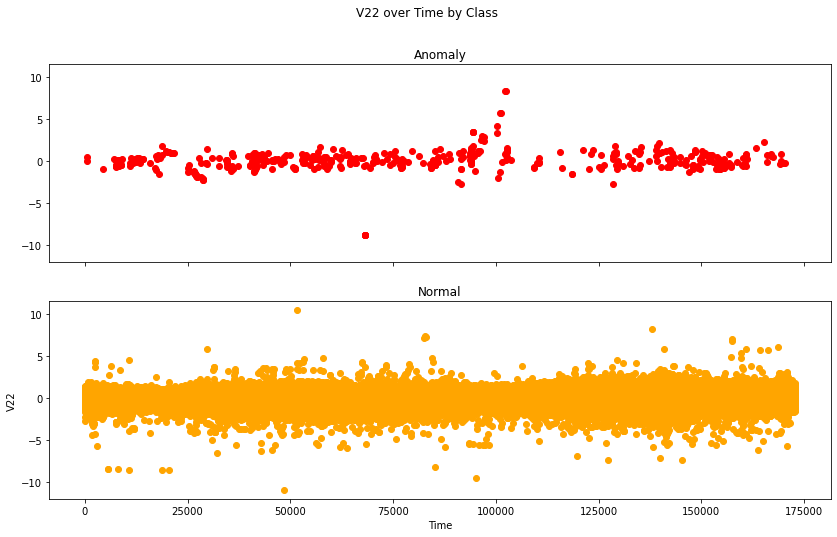

V23 vs Time


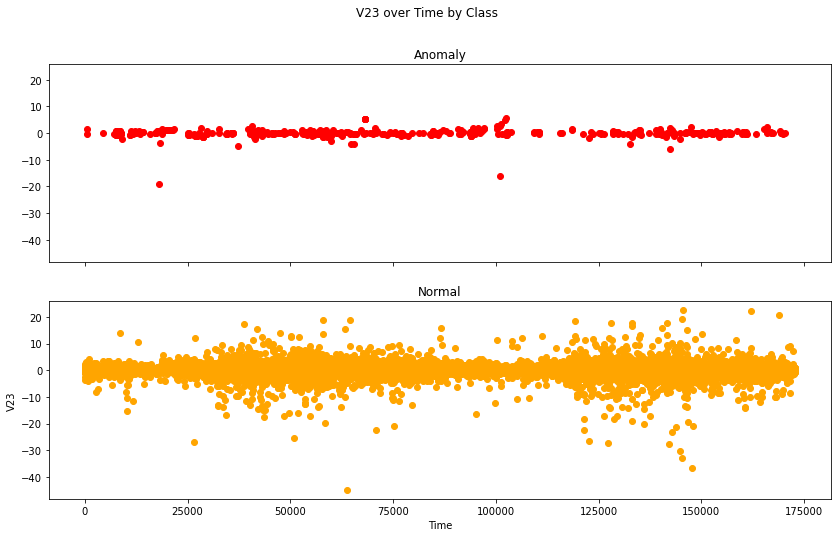

V24 vs Time


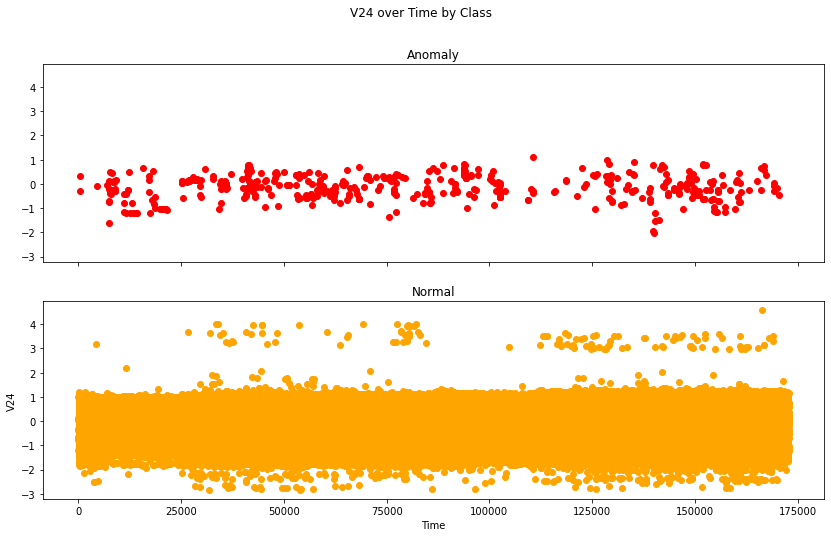

V25 vs Time


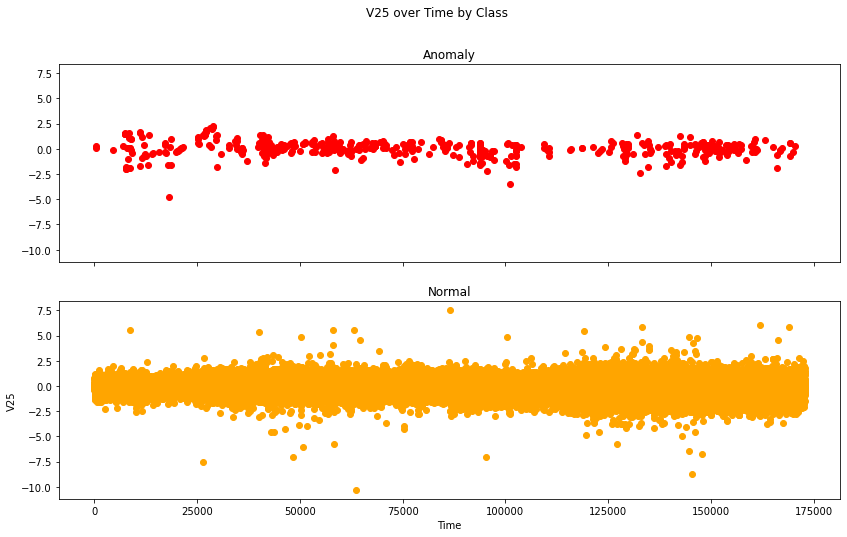

V26 vs Time


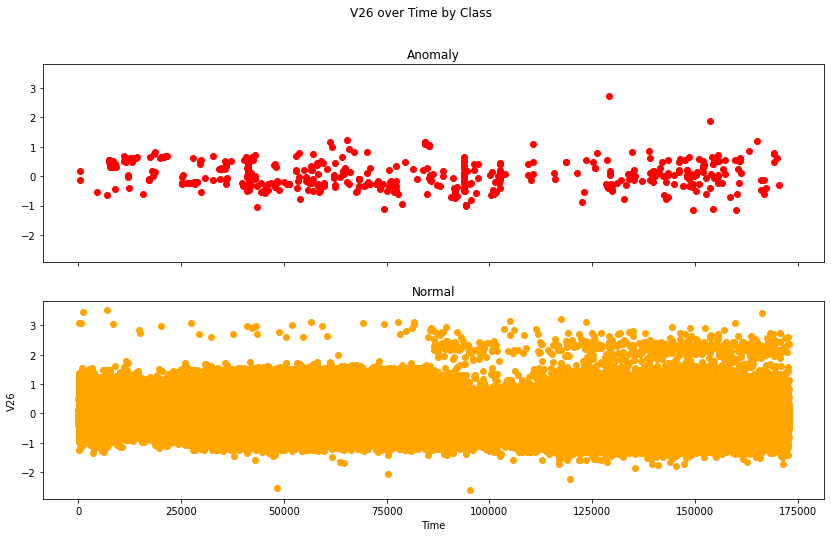

V27 vs Time


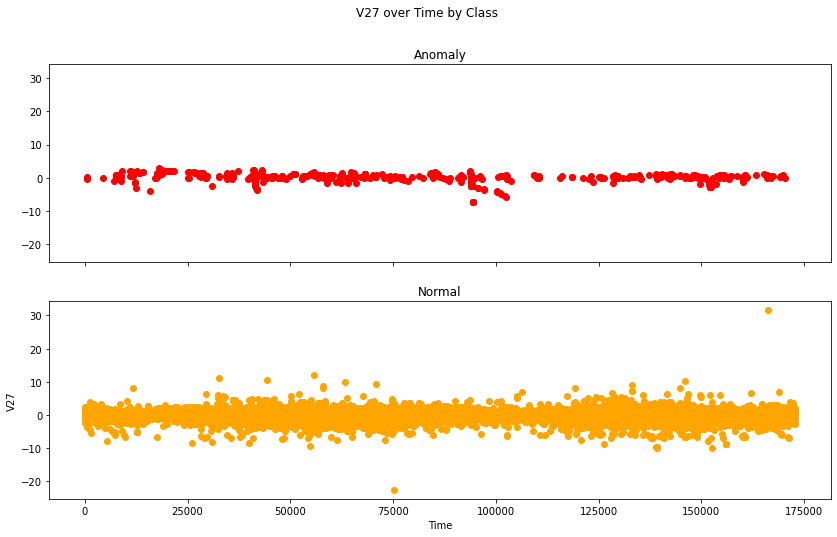

V28 vs Time


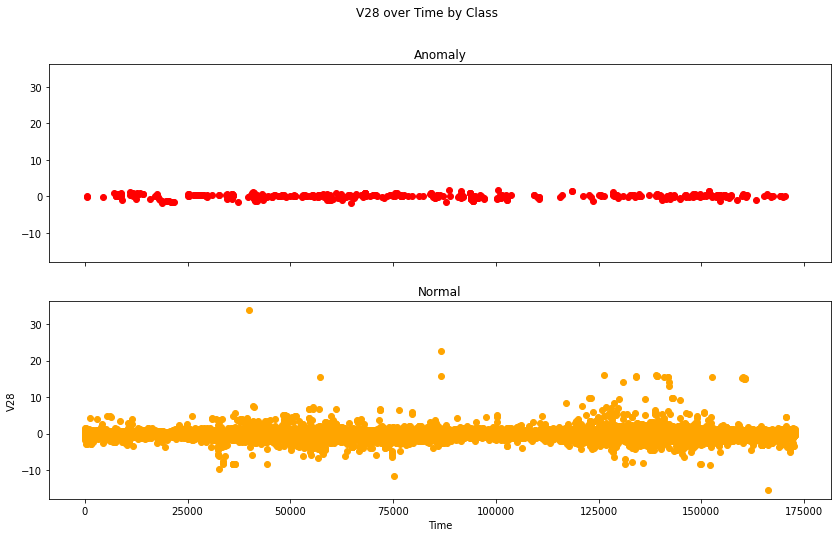

CPU times: user 34.9 s, sys: 532 ms, total: 35.5 s
Wall time: 35.4 s


In [9]:
%%time
#variation in time
for f in range(1, 29):
    print(f'V{f} vs Time')
    plot_scatter(df, "Time", f'V{f}', sharey=True)

Amount vs V1


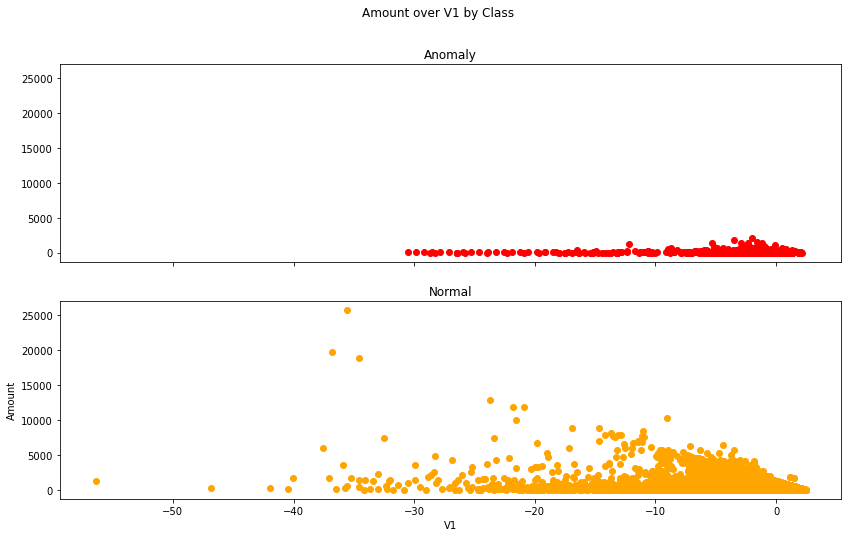

Amount vs V2


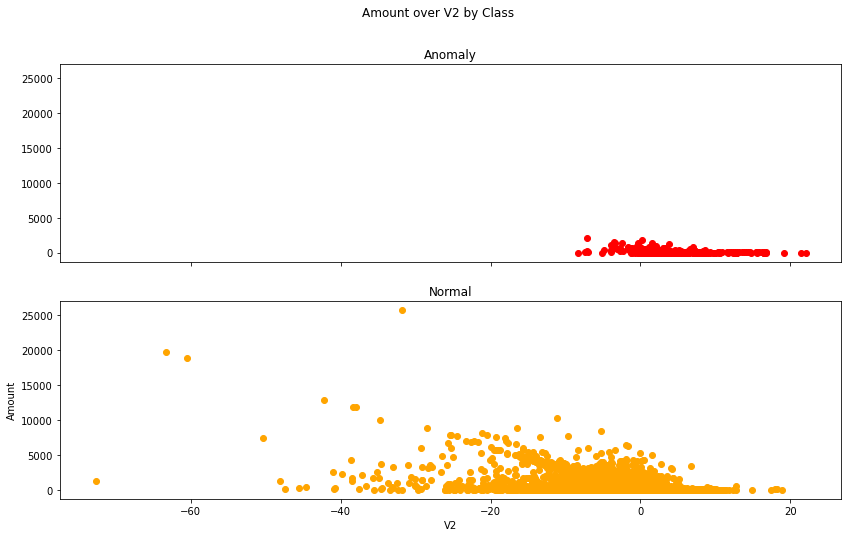

Amount vs V3


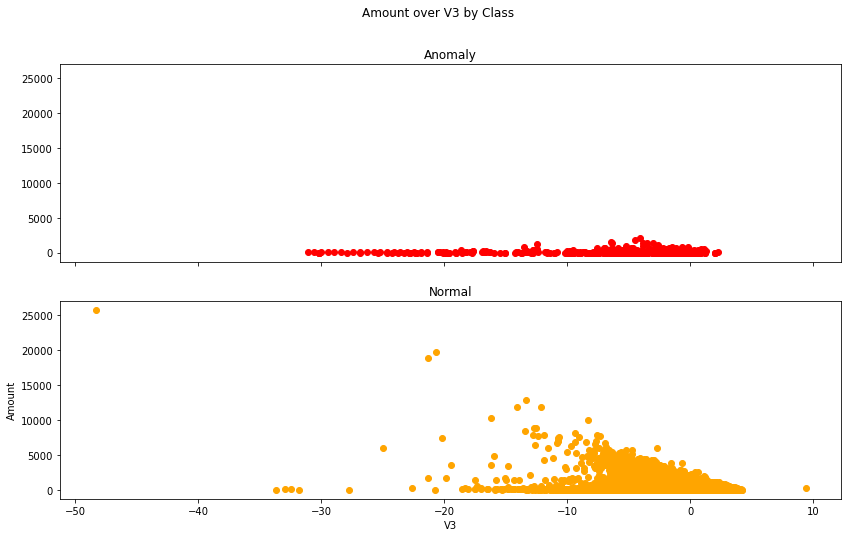

Amount vs V4


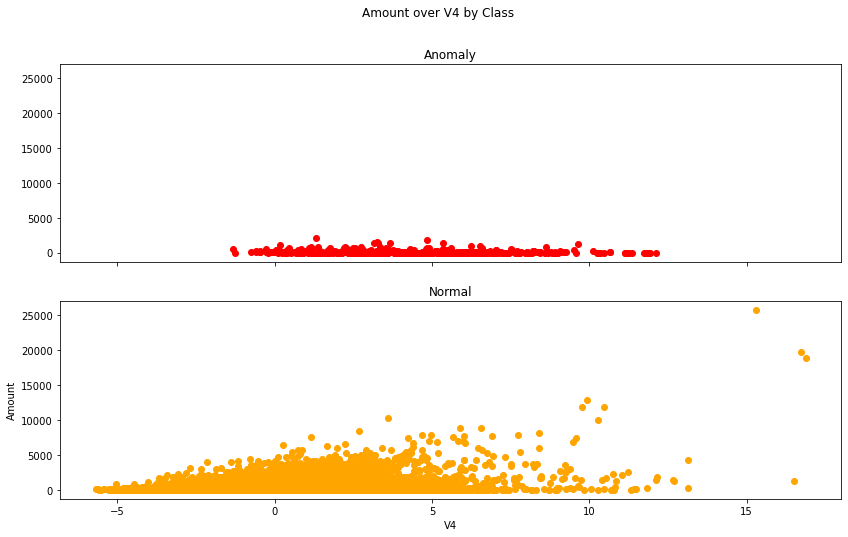

Amount vs V5


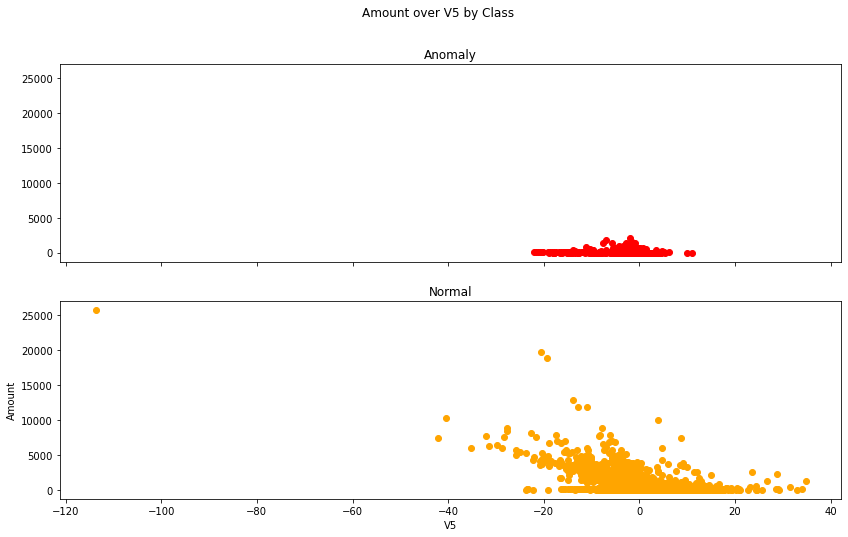

Amount vs V6


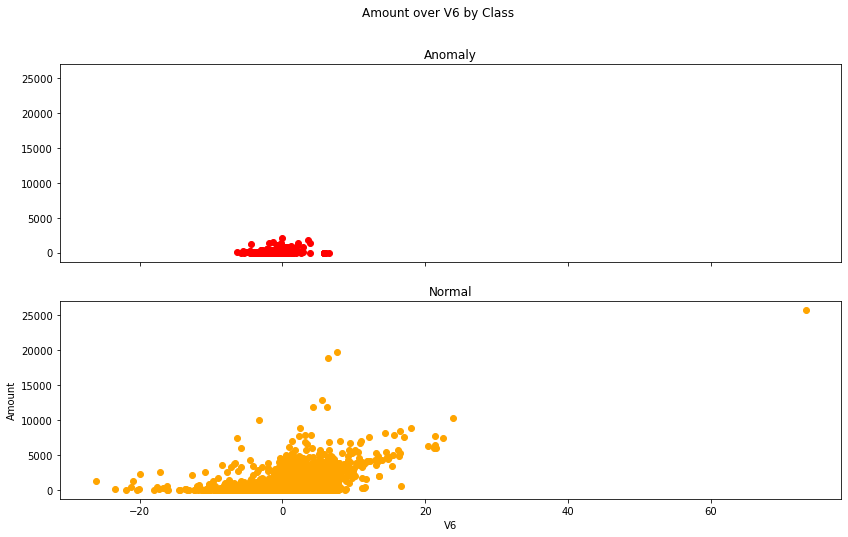

Amount vs V7


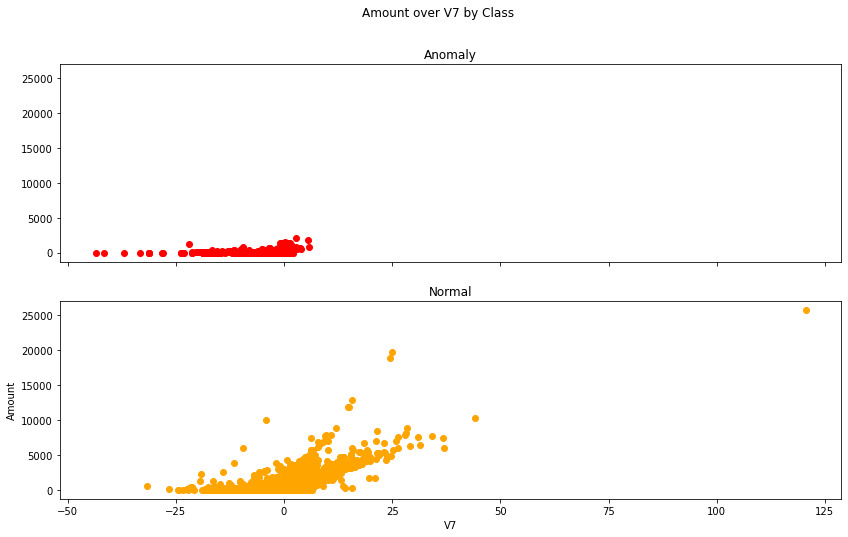

Amount vs V8


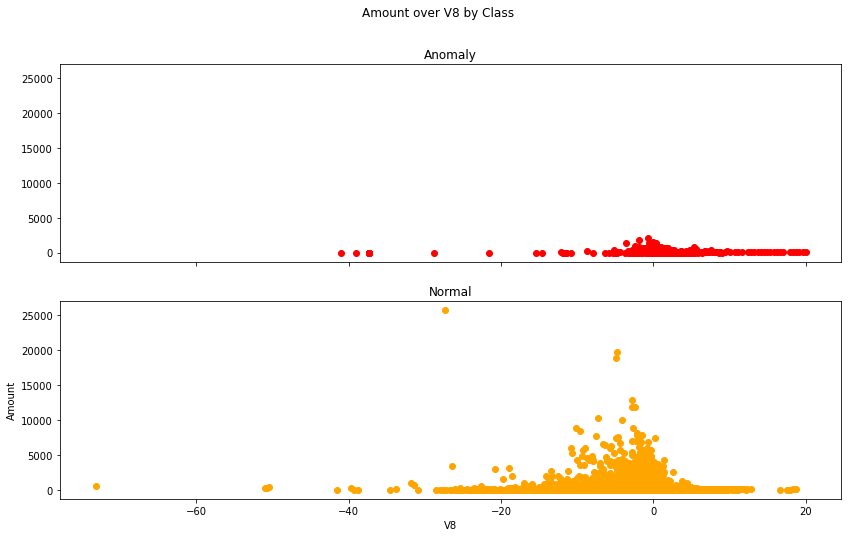

Amount vs V9


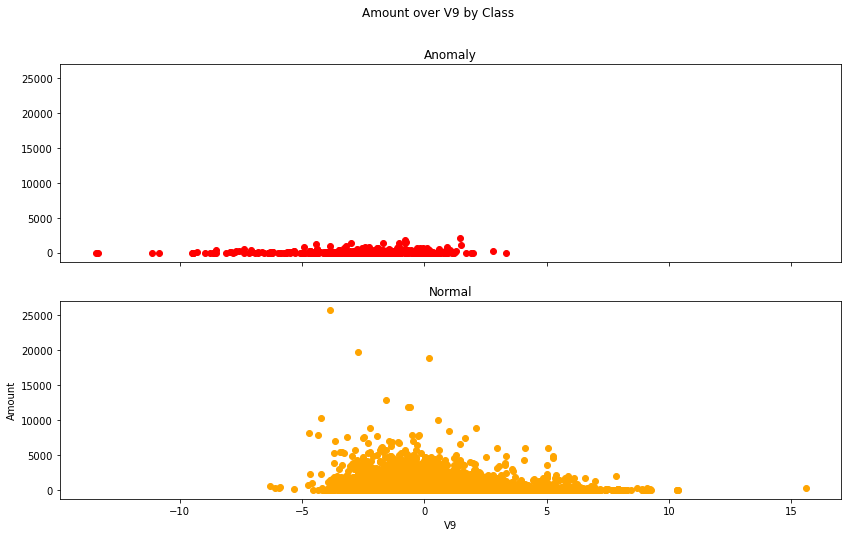

Amount vs V10


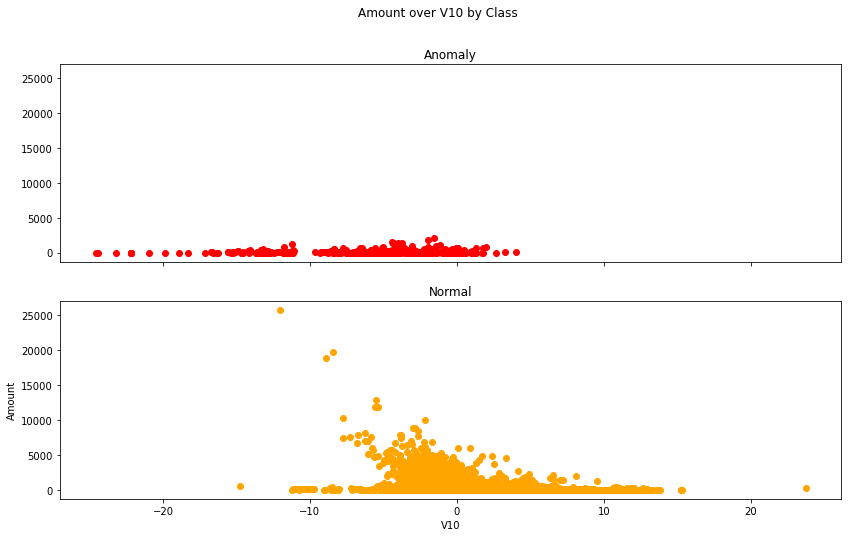

Amount vs V11


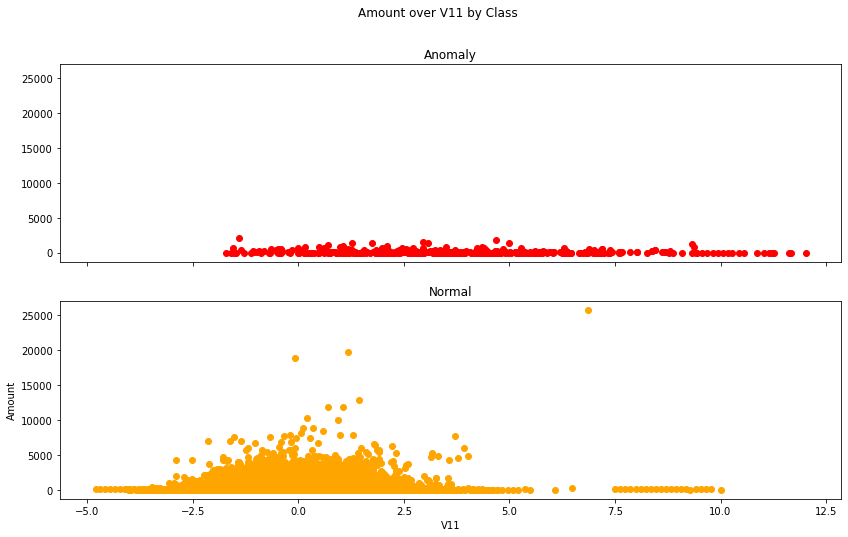

Amount vs V12


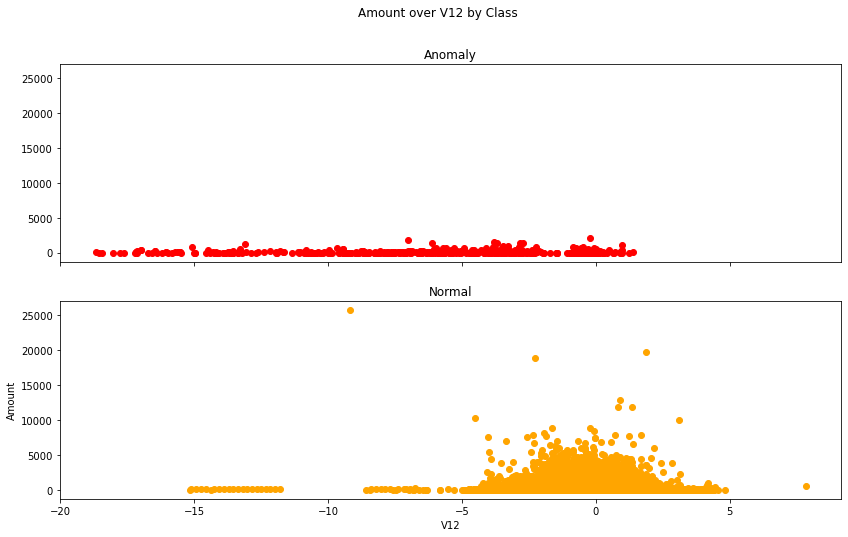

Amount vs V13


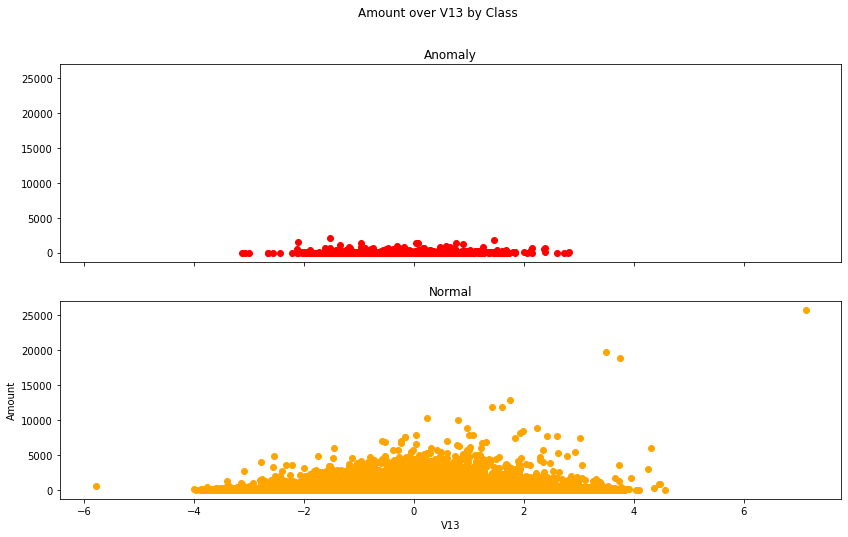

Amount vs V14


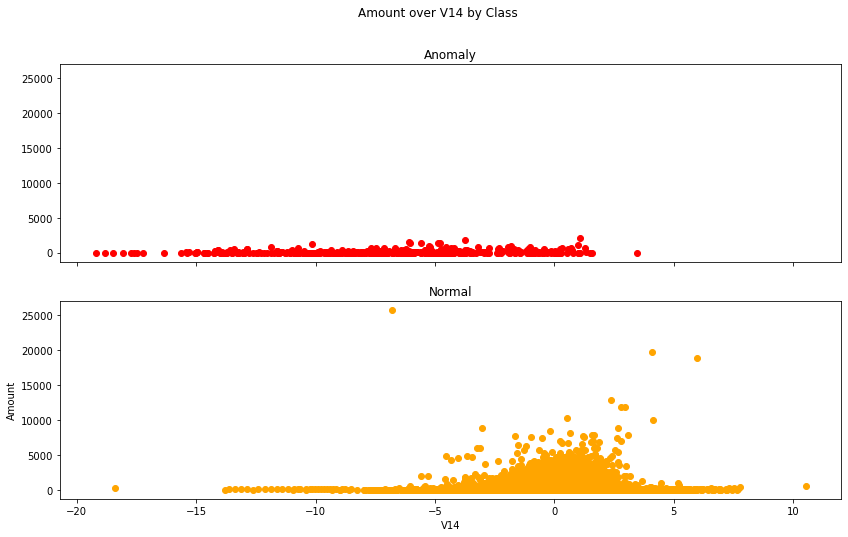

Amount vs V15


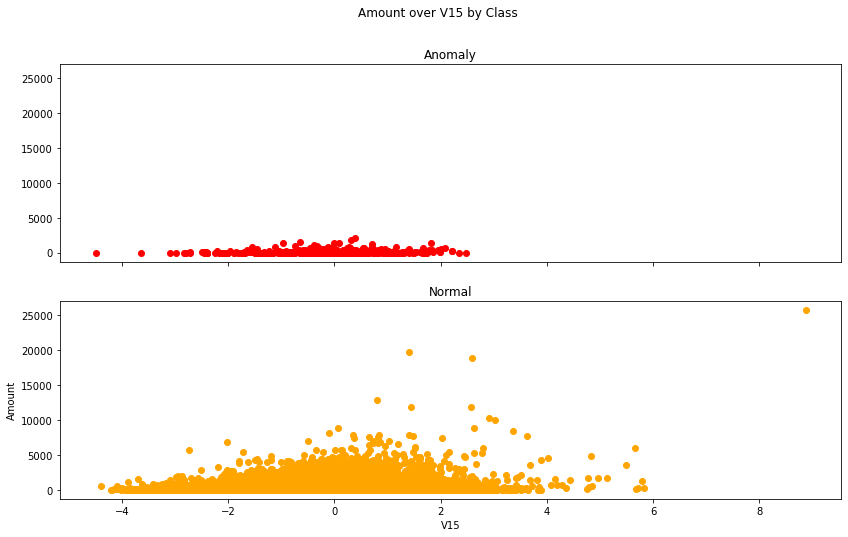

Amount vs V16


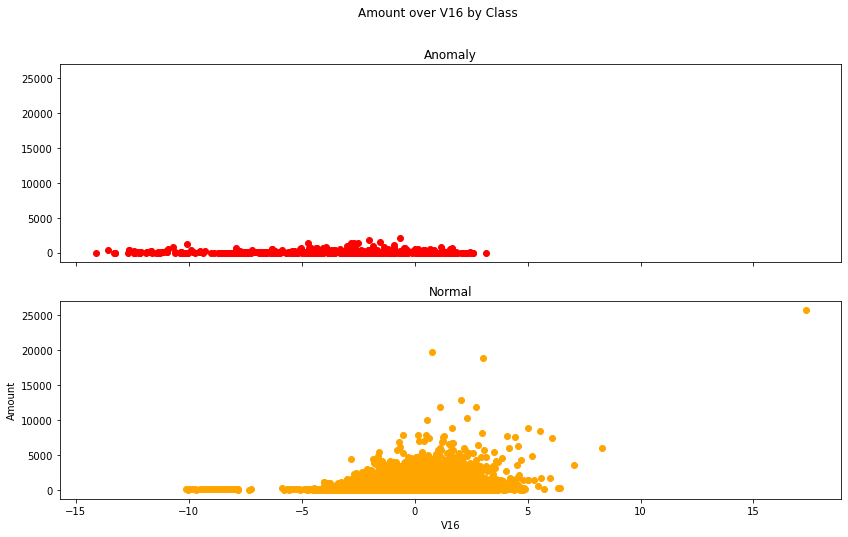

Amount vs V17


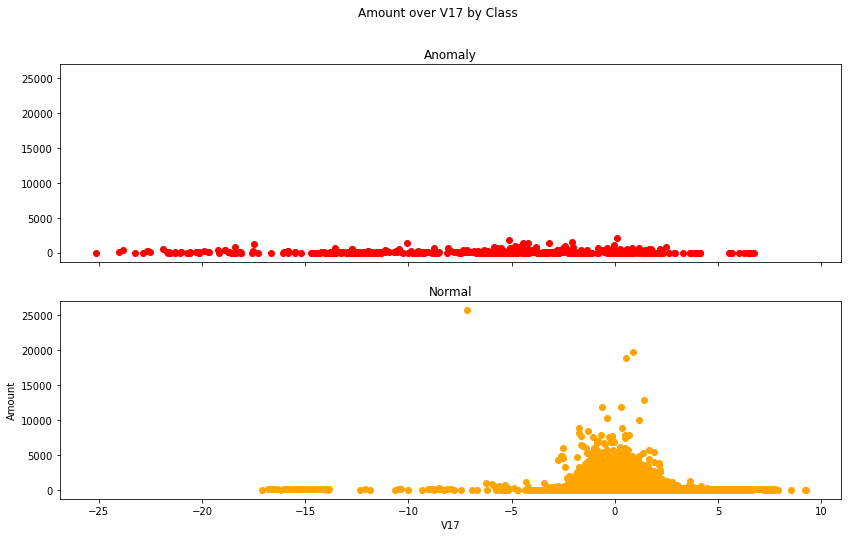

Amount vs V18


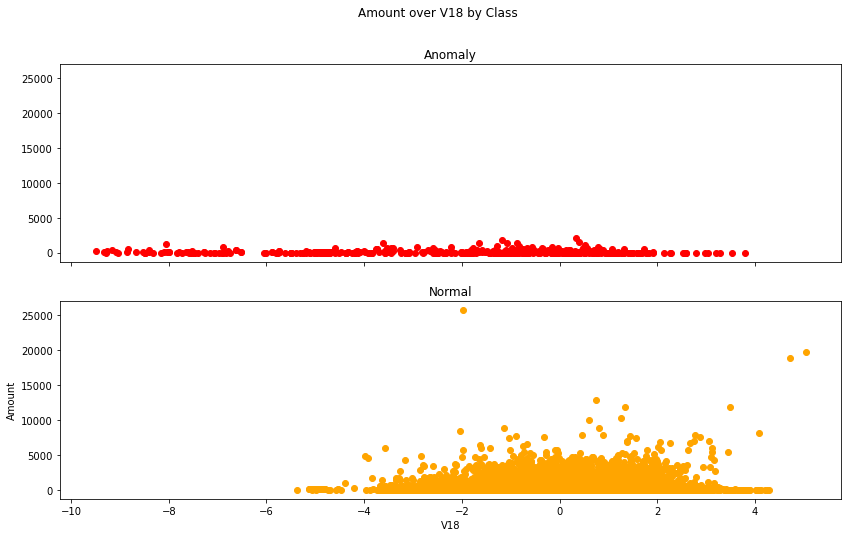

Amount vs V19


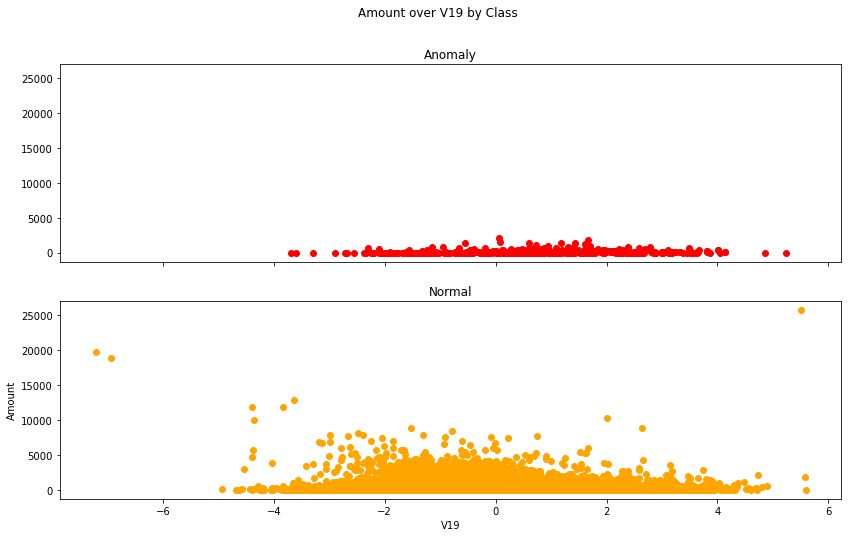

Amount vs V20


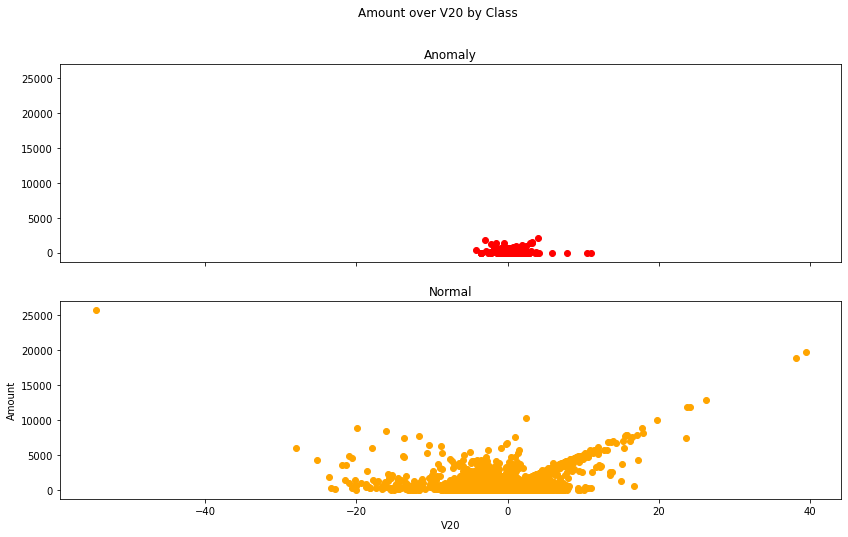

Amount vs V21


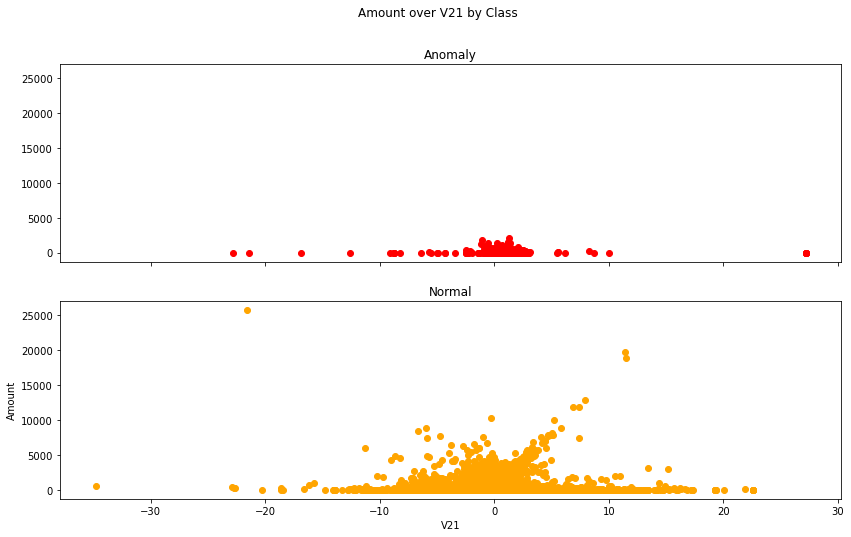

Amount vs V22


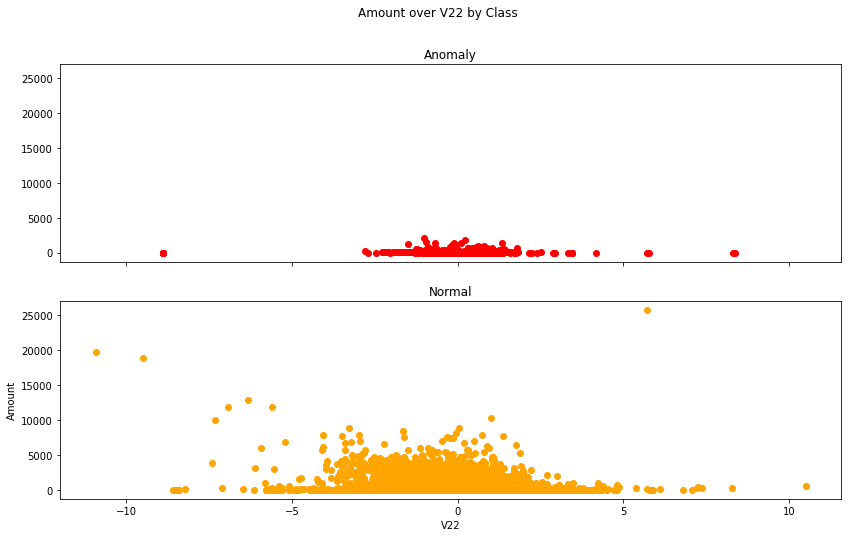

Amount vs V23


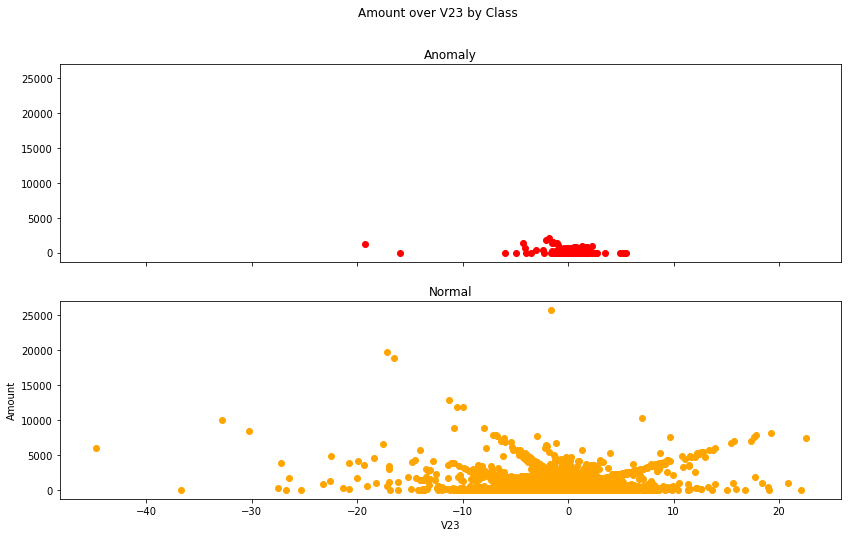

Amount vs V24


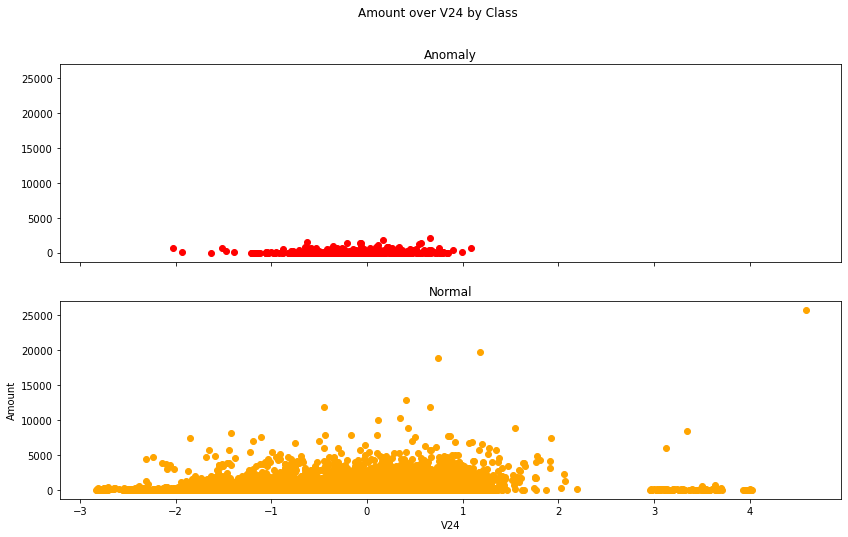

Amount vs V25


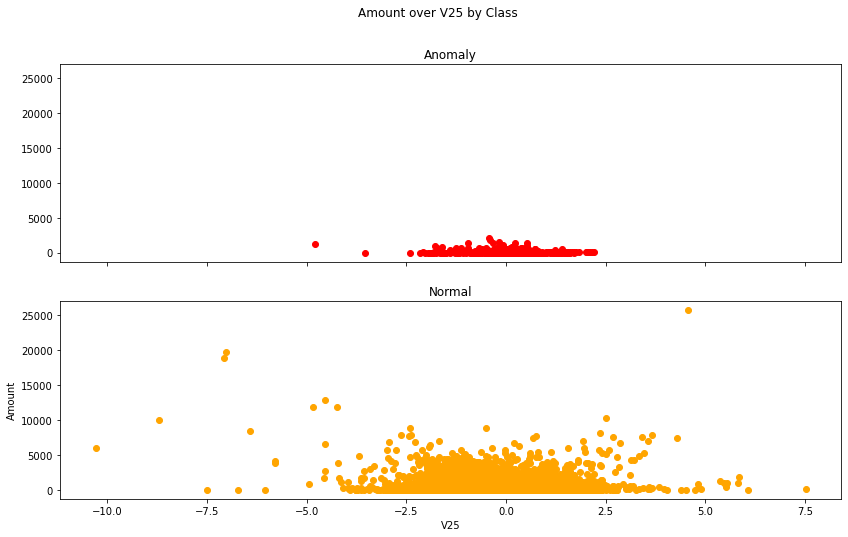

Amount vs V26


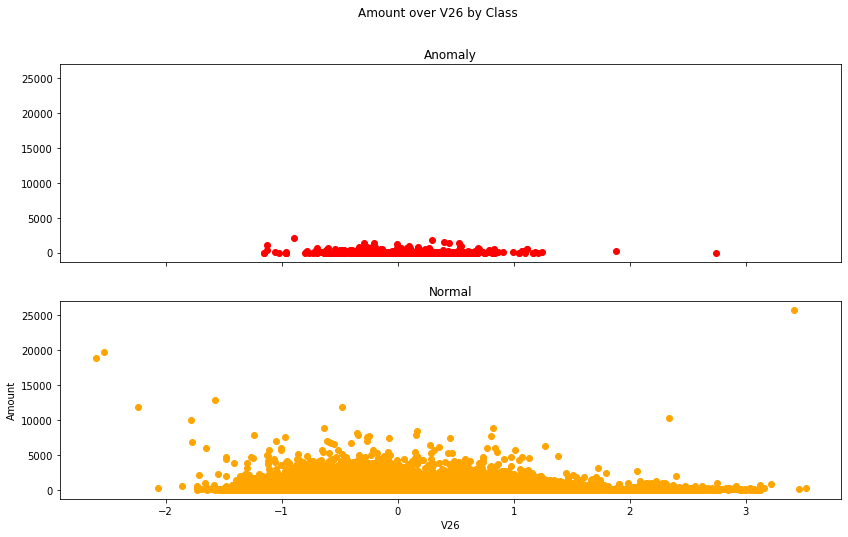

Amount vs V27


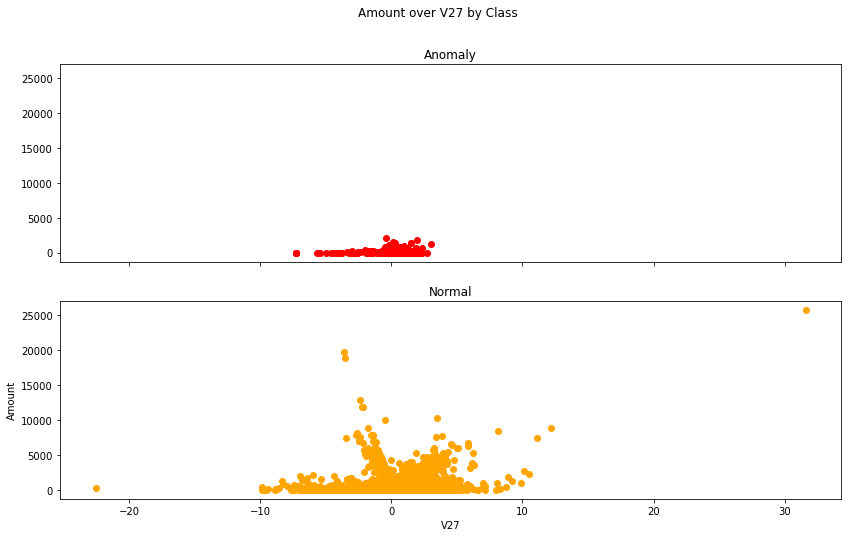

Amount vs V28


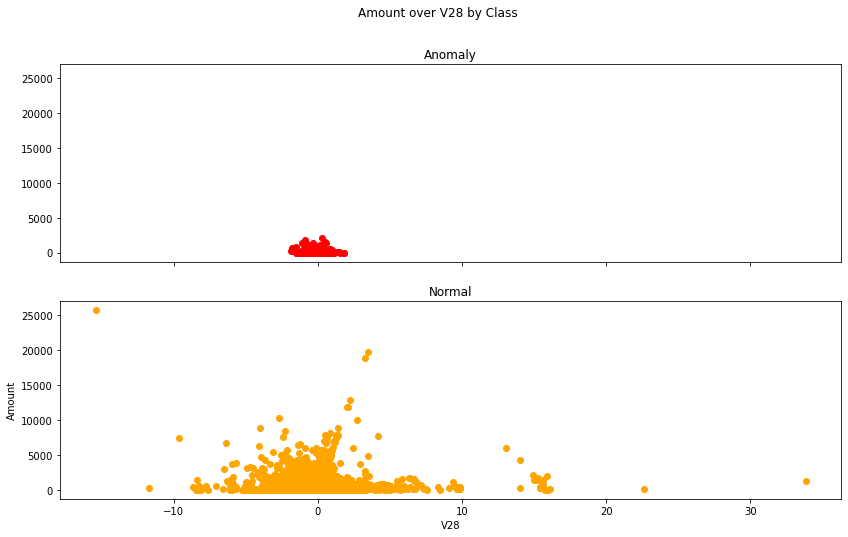

CPU times: user 34.8 s, sys: 544 ms, total: 35.3 s
Wall time: 35.3 s


In [10]:
%%time
for f in range(1, 29):
    print(f'Amount vs V{f}')
    plot_scatter(df, f'V{f}', "Amount", sharey=True)